In [133]:
#pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [132]:
# Import temporal modules needed for testing plotting
import matplotlib.pyplot as plt
import numpy as np
import os 
from datetime import datetime
import seaborn as sns

%matplotlib inline


In [183]:
# Extract results arrays

# Define the path to the parent directory
#parent_dir = '/home/jovyan/experiment_data/2022-2023_48h_experiment/batch_output'
parent_dir = '/home/jovyan/experiment_data/2022-2023_48h_experiment/52-82_orbit_2022-2023_batch_output'

In [140]:
save_dir = '/home/jovyan/experiment_data/2022-2023_48h_experiment/52-82_orbit_2022-2023_batch_output/analysis_plots'
def save_plot(save_dir, name):
    save_path = os.path.join(save_dir, f"{name}.png")
    fig.savefig(save_path, dpi=300, bbox_inches='tight')

## 1. Analysis of error of distortion (corr, hes, ssmi) of SAR forecast

In [244]:
def export_pm_output_data(parent_dir, vars_folder_name, variable_names):
    """
    Extracts pattern matching output variables from .npz files in subdirectories of a parent directory.
    
    Args:
    parent_dir (str): The path to the parent directory containing subdirectories.
    vars_folder_name (str): The name of the folder within each subdirectory that contains the .npz file.
    **kwargs: Keyword arguments specifying the variable names to extract from the .npz files.
    
    The possible key variables to extract and their descriptions are:
    - upm: Eastward ice drift displacement in destination SRS units.
    - vpm: Northward ice drift displacement in destination SRS units.
    - apm: Angle that gives the highest MCC (Maximum Cross Correlation).
    - rpm: Maximum cross correlation (MCC) value.
    - hpm: Hessian of the cross-correlation at the MCC point.
    - ssim: Similarity index between the two images for each point.
    - lon2pm: Longitude of results on image 2.
    - lat2pm: Latitude of results on image 2.
    - gpi1: Mask of good pixels after filtering with the hessian.
    - gpi2: Mask of good pixels after filtering with the hessian and number of neighboring pixels.
    - model_u - Eastward model ice drift displacement in destination SRS units.
    - model_v - Northward model ice drift displacement in destination SRS units.
    
    Returns:
    dict: A dictionary containing lists of extracted data for each specified variable.
    list: A list of timestamps extracted from the folder names.
    """
    
    # Initialize a dictionary to hold lists for each variable
    data_dict = {var: [] for var in variable_names}
    timestamps = []

    # Iterate through subdirectories (folders for each pair)
    for subdir in os.listdir(parent_dir):
        sub_dir_path = os.path.join(parent_dir, subdir)

        # Check if the .npz file exists
        npz_file_path = os.path.join(sub_dir_path, vars_folder_name, f'{vars_folder_name}.npz')
        if os.path.exists(npz_file_path):
            # Load the contents of the .npz file
            npz_data = np.load(npz_file_path)
            

            # Extract and append parameters to their respective lists in the dictionary
            for var in variable_names:
                if var in npz_data:
                    data_dict[var].append(npz_data[var])

            # Extract and append the timestamps from folder names
            timestamps.append(subdir)

    # Return the dictionary and the timestamps
    return data_dict, timestamps


def calculate_mean_distor_parameters(timestamps, rpm_list, hpm_list, ssim_list, gpi_list=None):
    """
    Calculates the mean, minimum, and maximum values for various distortion parameters 
    for each timestamp and optionally filters the data based on a good pixel index list.

    Parameters:
    timestamps (list): List of timestamps corresponding to each set of data.
    rpm_list (list): List of RPM (Maximum Cross Correlation) values for each timestamp.
    hpm_list (list): List of HPM (Hessian of Cross-Correlation at MCC point) values for each timestamp.
    ssim_list (list): List of SSIM (Similarity Index) values for each timestamp.
    gpi (list, optional): List of good pixel index masks to filter the data. 
                               If None, no filtering is applied.

    Returns:
    dict: A dictionary containing the following keys and their corresponding list of values:
        - 'rpm_mean': Mean values of RPM.
        - 'rpm_min': Minimum values of RPM.
        - 'rpm_max': Maximum values of RPM.
        - 'hpm_mean': Mean values of HPM.
        - 'hpm_min': Minimum values of HPM.
        - 'hpm_max': Maximum values of HPM.
        - 'ssim_mean': Mean values of SSIM.
        - 'ssim_min': Minimum values of SSIM.
        - 'ssim_max': Maximum values of SSIM.
    
    Each key in the dictionary corresponds to a specific statistic (mean, min, max) for each parameter (RPM, HPM, SSIM).
    """
    
    # Initialize a dictionary to store statistics for each parameter
    statistics = {
        'rpm_mean': [], 'rpm_min': [], 'rpm_max': [],
        'hpm_mean': [], 'hpm_min': [], 'hpm_max': [],
        'ssim_mean': [], 'ssim_min': [], 'ssim_max': []
    }

    # Iterate through the pairs and calculate statistics
    for i in range(len(timestamps)):
        # Determine data based on whether gpi_list is defined
        rpm_data = rpm_list[i] if gpi_list is None else rpm_list[i][gpi_list[i]]
        hpm_data = hpm_list[i] if gpi_list is None else hpm_list[i][gpi_list[i]]
        ssim_data = ssim_list[i] if gpi_list is None else ssim_list[i][gpi_list[i]]

        # Calculate and append statistics for RPM, HPM, and SSIM
        for param, data in zip(['rpm', 'hpm', 'ssim'], [rpm_data, hpm_data, ssim_data]):
            mean = round(np.nanmean(data), 2)
            min_val = round(np.nanmin(data), 2)
            max_val = round(np.nanmax(data), 2)

            statistics[f'{param}_mean'].append(mean)
            statistics[f'{param}_min'].append(min_val)
            statistics[f'{param}_max'].append(max_val)

        # Print the calculated statistics for the current pair
        print(f"Pair {i + 1}:")
        print(f"RPM Mean: {statistics['rpm_mean'][-1]}, Min: {statistics['rpm_min'][-1]}, Max: {statistics['rpm_max'][-1]}")
        print(f"HPM Mean: {statistics['hpm_mean'][-1]}, Min: {statistics['hpm_min'][-1]}, Max: {statistics['hpm_max'][-1]}")
        print(f"SSIM Mean: {statistics['ssim_mean'][-1]}, Min: {statistics['ssim_min'][-1]}, Max: {statistics['ssim_max'][-1]}")
        print("-" * 20)

    return statistics




In [339]:
# Exporting drift parametrs (between SAR1 and SAR2)
sar_drift_folder_name = 'sar_drift_output'
drift_variable_names = ['upm', 'vpm', 'rpm', 'hpm', 'ssim', 'gpi2' ]
sar_drift_data, timestamps = export_pm_output_data(parent_dir, sar_drift_folder_name, drift_variable_names)


u_sar_list = sar_drift_data['upm']
v_sar_list = sar_drift_data['vpm']
sar12_rpm_list = sar_drift_data['rpm']
sar12_hpm_list = sar_drift_data['hpm']
sar12_ssim_list = sar_drift_data['ssim']
gpi2_list = sar_drift_data['gpi2']
len(timestamps)

20

In [344]:
# Exporting distortion parametrs (between SAR2 real and SAR2 predictions)
sar_distor_folder_name = 'sar_distort_error_data'
distor_variable_names = ['rpm', 'hpm', 'ssim', 'gpi2']
sar_distor_data, timestamps = export_pm_output_data(parent_dir, sar_distor_folder_name, distor_variable_names)
    
sar_rpm_list = sar_distor_data['rpm']
sar_hpm_list = sar_distor_data['hpm']
sar_ssim_list = sar_distor_data['ssim']
gpi_sar_warp = sar_drift_data['gpi2']

In [198]:
len(sar_rpm_list)

20

In [146]:
sar_distor_statistics = calculate_mean_distor_parameters(timestamps, sar_rpm_list, sar_hpm_list, sar_ssim_list, gpi2_list)

sar_rpm_mean = sar_distor_statistics['rpm_mean']
sar_rpm_min = sar_distor_statistics['rpm_min']
sar_rpm_max = sar_distor_statistics['rpm_max']
sar_hpm_mean = sar_distor_statistics['hpm_mean']
sar_hpm_min = sar_distor_statistics['hpm_min']
sar_hpm_max = sar_distor_statistics['hpm_max']
sar_ssim_mean = sar_distor_statistics['ssim_mean']
sar_ssim_min = sar_distor_statistics['ssim_min']
sar_ssim_max = sar_distor_statistics['ssim_max']

Pair 1:
RPM Mean: 0.4, Min: 0.17, Max: 0.7
HPM Mean: 11.06, Min: 0.27, Max: 23.95
SSIM Mean: 0.28, Min: 0.03, Max: 0.55
--------------------
Pair 2:
RPM Mean: 0.4, Min: 0.16, Max: 0.83
HPM Mean: 9.22, Min: 0.12, Max: 25.28
SSIM Mean: 0.25, Min: 0.01, Max: 0.71
--------------------
Pair 3:
RPM Mean: 0.52, Min: 0.15, Max: 0.9
HPM Mean: 14.28, Min: -0.14, Max: 31.61
SSIM Mean: 0.37, Min: 0.01, Max: 0.93
--------------------
Pair 4:
RPM Mean: 0.45, Min: 0.18, Max: 0.84
HPM Mean: 11.22, Min: -0.03, Max: 29.68
SSIM Mean: 0.3, Min: 0.01, Max: 0.85
--------------------
Pair 5:
RPM Mean: 0.58, Min: 0.17, Max: 0.91
HPM Mean: 15.36, Min: -0.53, Max: 30.91
SSIM Mean: 0.4, Min: 0.0, Max: 0.74
--------------------
Pair 6:
RPM Mean: 0.56, Min: 0.2, Max: 0.92
HPM Mean: 15.29, Min: -0.24, Max: 31.92
SSIM Mean: 0.4, Min: 0.01, Max: 0.89
--------------------
Pair 7:
RPM Mean: 0.48, Min: 0.18, Max: 0.85
HPM Mean: 11.72, Min: 0.39, Max: 29.04
SSIM Mean: 0.32, Min: 0.02, Max: 0.8
--------------------
Pair 8

In [147]:
print(timestamps)
date_labels = []
for ts in timestamps:
    # Split the string into the start and end dates
    start_date_str, end_date_str = ts.split('_')
    # Convert to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y%m%dT%H%M%S")
    end_date = datetime.strptime(end_date_str, "%Y%m%dT%H%M%S")
    # Format the dates as "DD-DD.MM.YYYY"
    date_label = f"{start_date.day:02d}-{end_date.day:02d}.{start_date.month:02d}.{start_date.year}"
    date_labels.append(date_label)
date_labels

['20220921T080154_20220923T074534', '20221003T080155_20221005T074535', '20221015T080155_20221017T074535', '20221027T080155_20221029T074535', '20221108T080155_20221110T074535', '20221120T080155_20221122T074535', '20221202T080154_20221204T074534', '20221207T081027_20221209T075358', '20221226T080153_20221228T074533', '20230107T080152_20230109T074532', '20230119T080151_20230121T074532', '20230210T081814_20230212T080151', '20230212T080151_20230214T074531', '20230224T080151_20230226T074531', '20230308T080151_20230310T074531', '20230320T080151_20230322T074531', '20230327T075355_20230329T073729', '20230401T080151_20230403T074532', '20230413T080152_20230415T074532', '20230425T080152_20230427T074532']


['21-23.09.2022',
 '03-05.10.2022',
 '15-17.10.2022',
 '27-29.10.2022',
 '08-10.11.2022',
 '20-22.11.2022',
 '02-04.12.2022',
 '07-09.12.2022',
 '26-28.12.2022',
 '07-09.01.2023',
 '19-21.01.2023',
 '10-12.02.2023',
 '12-14.02.2023',
 '24-26.02.2023',
 '08-10.03.2023',
 '20-22.03.2023',
 '27-29.03.2023',
 '01-03.04.2023',
 '13-15.04.2023',
 '25-27.04.2023']

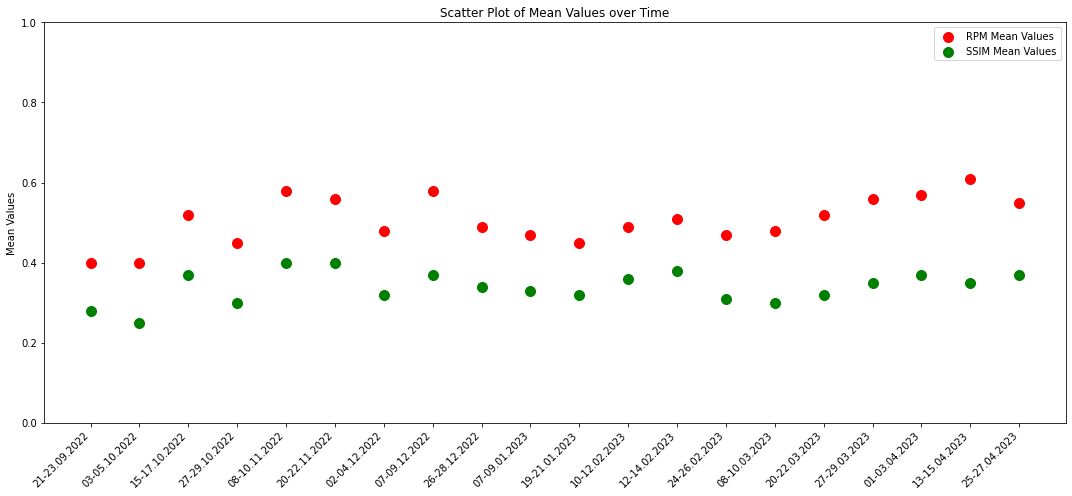

In [148]:
# Create a scatter plot

fig = plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, sar_rpm_mean, color='red', s=100, label='RPM Mean Values')
plt.scatter(date_labels, sar_ssim_mean, color='green',s=100, label='SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

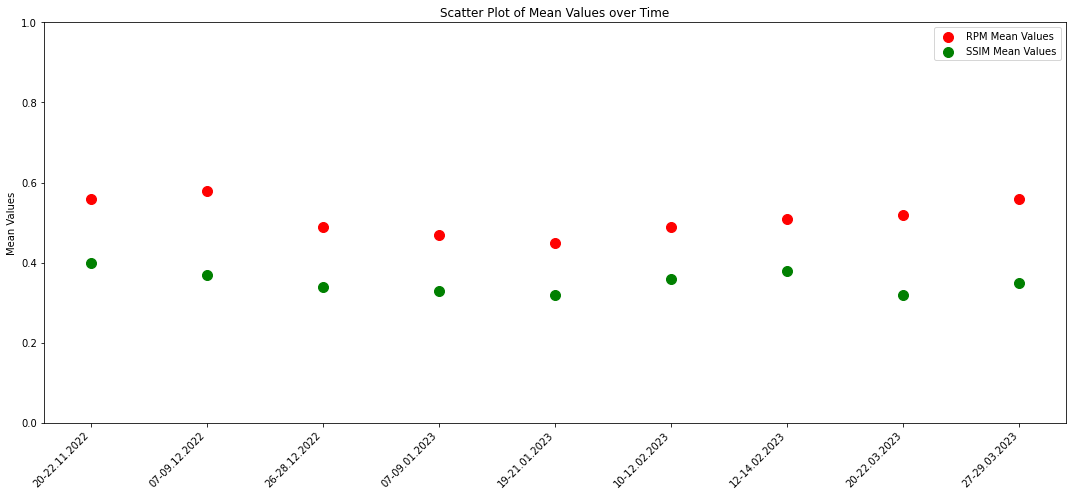

In [28]:
# Create a scatter plot

fig = plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, sar_rpm_mean, color='red', s=100, label='RPM Mean Values')
plt.scatter(date_labels, sar_ssim_mean, color='green',s=100, label='SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

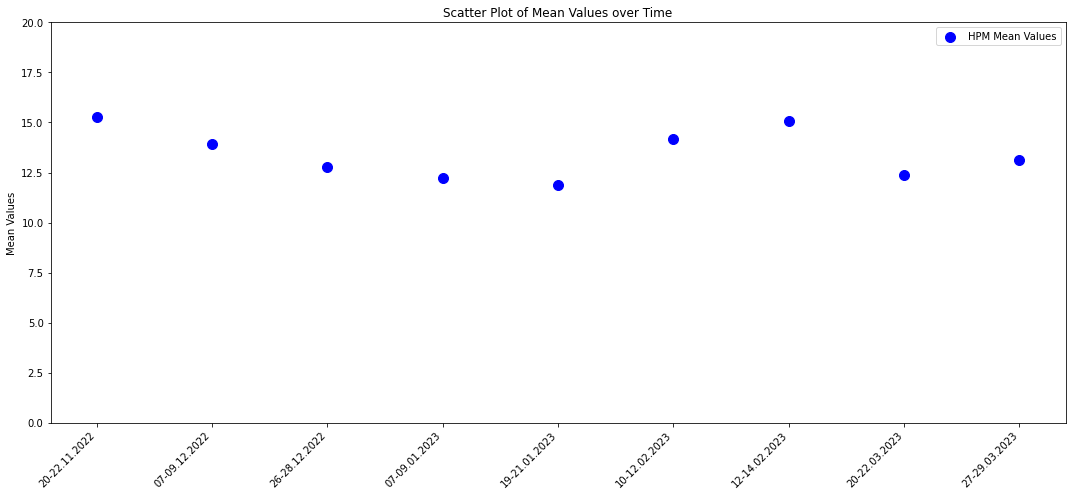

In [32]:
# Create a scatter plot
fig = plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, sar_hpm_mean, color='blue', s=100, label='HPM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 20])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

## 2 Analysis of error of distortion (corr, hes, ssmi) of Model forecast

In [208]:
# Exporting distortion parametrs (between SAR2 real and SAR2 predictions)
mod_distor_folder_name = 'model_distort_error_data'
distor_variable_names = ['rpm', 'hpm', 'ssim']
mod_distor_data, timestamps = export_pm_output_data(parent_dir, mod_distor_folder_name, distor_variable_names)
    
mod_rpm_list = mod_distor_data['rpm']
mod_hpm_list = mod_distor_data['hpm']
mod_ssim_list =mod_distor_data['ssim']

In [245]:
mod_distor_statistics = calculate_mean_distor_parameters(timestamps, mod_rpm_list, mod_hpm_list, mod_ssim_list, gpi_list=None)

mod_rpm_mean = mod_distor_statistics['rpm_mean']
mod_rpm_min = mod_distor_statistics['rpm_min']
mod_rpm_max = mod_distor_statistics['rpm_max']
mod_hpm_mean = mod_distor_statistics['hpm_mean']
mod_hpm_min = mod_distor_statistics['hpm_min']
mod_hpm_max = mod_distor_statistics['hpm_max']
mod_ssim_mean = mod_distor_statistics['ssim_mean']
mod_ssim_min = mod_distor_statistics['ssim_min']
mod_ssim_max = mod_distor_statistics['ssim_max']

Pair 1:
RPM Mean: 0.29, Min: 0.14, Max: 0.92
HPM Mean: 4.15, Min: -1.29, Max: 21.18
SSIM Mean: 0.14, Min: 0.0, Max: 0.49
--------------------
Pair 2:
RPM Mean: 0.29, Min: 0.0, Max: 0.92
HPM Mean: 3.8, Min: -1.18, Max: 109.37
SSIM Mean: 0.14, Min: 0.0, Max: 0.79
--------------------
Pair 3:
RPM Mean: 0.33, Min: 0.14, Max: 0.89
HPM Mean: 4.27, Min: -1.08, Max: 24.21
SSIM Mean: 0.16, Min: 0.0, Max: 0.84
--------------------
Pair 4:
RPM Mean: 0.35, Min: 0.15, Max: 0.87
HPM Mean: 5.59, Min: -0.79, Max: 24.0
SSIM Mean: 0.18, Min: 0.0, Max: 0.88
--------------------
Pair 5:
RPM Mean: 0.43, Min: 0.15, Max: 0.9
HPM Mean: 6.87, Min: -0.9, Max: 27.84
SSIM Mean: 0.22, Min: 0.0, Max: 0.75
--------------------
Pair 6:
RPM Mean: 0.42, Min: 0.15, Max: 0.93
HPM Mean: 6.52, Min: -0.9, Max: 29.43
SSIM Mean: 0.22, Min: 0.01, Max: 0.97
--------------------
Pair 7:
RPM Mean: 0.34, Min: 0.0, Max: 0.89
HPM Mean: 3.63, Min: -0.94, Max: 94.9
SSIM Mean: 0.13, Min: 0.0, Max: 0.85
--------------------
Pair 8:
RPM 

In [246]:
print(f"srpm\trpm\tshpm\tmhpm\tsssim\tmssim")
for sar_rpm, mod_rpm, sar_hpm, mod_hpm, sar_ssim, mod_ssim  in zip(sar_rpm_mean, mod_rpm_mean, sar_hpm_mean, mod_hpm_mean, sar_ssim_mean,mod_ssim_mean):
    print(f"{sar_rpm}\t{mod_rpm}\t{sar_hpm}\t{mod_hpm}\t{sar_ssim}\t{mod_ssim}")

srpm	rpm	shpm	mhpm	sssim	mssim
0.4	0.29	11.06	4.15	0.28	0.14
0.4	0.29	9.22	3.8	0.25	0.14
0.52	0.33	14.28	4.27	0.37	0.16
0.45	0.35	11.22	5.59	0.3	0.18
0.58	0.43	15.36	6.87	0.4	0.22
0.56	0.42	15.29	6.52	0.4	0.22
0.48	0.34	11.72	3.63	0.32	0.13
0.58	0.45	13.93	4.86	0.37	0.19
0.49	0.36	12.75	5.1	0.34	0.17
0.47	0.38	12.23	6.44	0.33	0.21
0.45	0.36	11.87	5.8	0.32	0.18
0.49	0.3	14.15	5.74	0.36	0.17
0.51	0.38	15.08	7.88	0.38	0.23
0.47	0.34	11.27	5.83	0.31	0.18
0.48	0.36	11.14	6.57	0.3	0.19
0.52	0.46	12.37	8.83	0.32	0.25
0.56	0.47	13.14	8.56	0.35	0.26
0.57	0.46	14.09	7.73	0.37	0.24
0.61	0.49	11.96	7.82	0.35	0.25
0.55	0.43	13.74	6.94	0.37	0.22


In [224]:
print(f"srpm\trpm\tshpm\tmhpm\tsssim\tmssim")
for sar_rpm, mod_rpm, sar_hpm, mod_hpm, sar_ssim, mod_ssim  in zip(sar_rpm_mean, mod_rpm_mean, sar_hpm_mean, mod_hpm_mean, sar_ssim_mean,mod_ssim_mean):
    print(f"{sar_rpm}\t{mod_rpm}\t{sar_hpm}\t{mod_hpm}\t{sar_ssim}\t{mod_ssim}")

srpm	rpm	shpm	mhpm	sssim	mssim
0.4	0.36	11.06	8.65	0.28	0.24
0.4	0.33	9.22	5.32	0.25	0.18
0.52	0.36	14.28	4.56	0.37	0.17
0.45	0.38	11.22	7.42	0.3	0.23
0.58	0.47	15.36	8.92	0.4	0.28
0.56	0.46	15.29	8.72	0.4	0.27
0.48	0.34	11.72	4.0	0.32	0.15
0.58	0.45	13.93	5.46	0.37	0.2
0.49	0.38	12.75	5.72	0.34	0.2
0.47	0.4	12.23	8.41	0.33	0.26
0.45	0.38	11.87	6.87	0.32	0.22
0.49	0.41	14.15	9.78	0.36	0.29
0.51	0.45	15.08	11.65	0.38	0.33
0.47	0.4	11.27	7.75	0.31	0.24
0.48	0.45	11.14	9.9	0.3	0.29
0.52	0.5	12.37	11.25	0.32	0.31
0.56	0.51	13.14	9.83	0.35	0.3
0.57	0.48	14.09	8.6	0.37	0.27
0.61	0.6	11.96	11.77	0.35	0.36
0.55	0.43	13.74	6.87	0.37	0.22


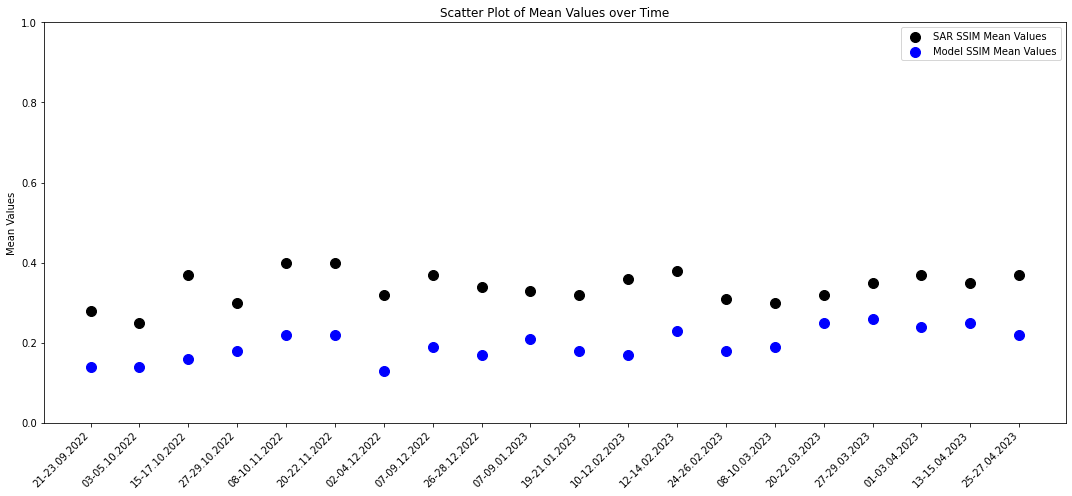

In [247]:
# Create a scatter plot
plt.close(fig)
fig = plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
#plt.scatter(date_labels, sar_rpm_mean, color='red', s=100, label='SAR RPM Mean Values')
#plt.scatter(date_labels, mod_rpm_mean, color='orange', s=100, label='MOD RPM Mean Values')
plt.scatter(date_labels, sar_ssim_mean, color='black',s=100, label='SAR SSIM Mean Values')
plt.scatter(date_labels, mod_ssim_mean, color='blue',s=100, label='Model SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

#save_plot(save_dir, "SSMI_change_without_gpi")
# Show the plot
plt.show()


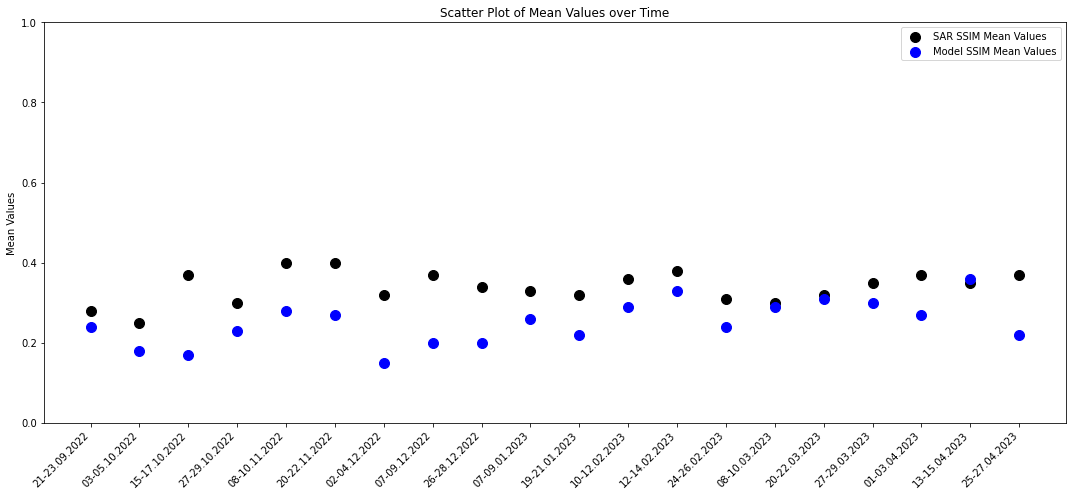

In [225]:
# Create a scatter plot
plt.close(fig)
fig = plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
#plt.scatter(date_labels, sar_rpm_mean, color='red', s=100, label='SAR RPM Mean Values')
#plt.scatter(date_labels, mod_rpm_mean, color='orange', s=100, label='MOD RPM Mean Values')
plt.scatter(date_labels, sar_ssim_mean, color='black',s=100, label='SAR SSIM Mean Values')
plt.scatter(date_labels, mod_ssim_mean, color='blue',s=100, label='Model SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

#save_plot(save_dir, "SSMI_change_without_gpi")
# Show the plot
plt.show()


In [226]:
# Calculate Relative Root Mean Square Error (RRMSE) for each date
rrmse_list = []

for i in range(len(timestamps)):
    rrmse_values = np.sqrt(((mod_ssim_mean[i] - sar_ssim_mean[i]) ** 2)) / sar_ssim_mean[i]
    rrmse_list.append(rrmse_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


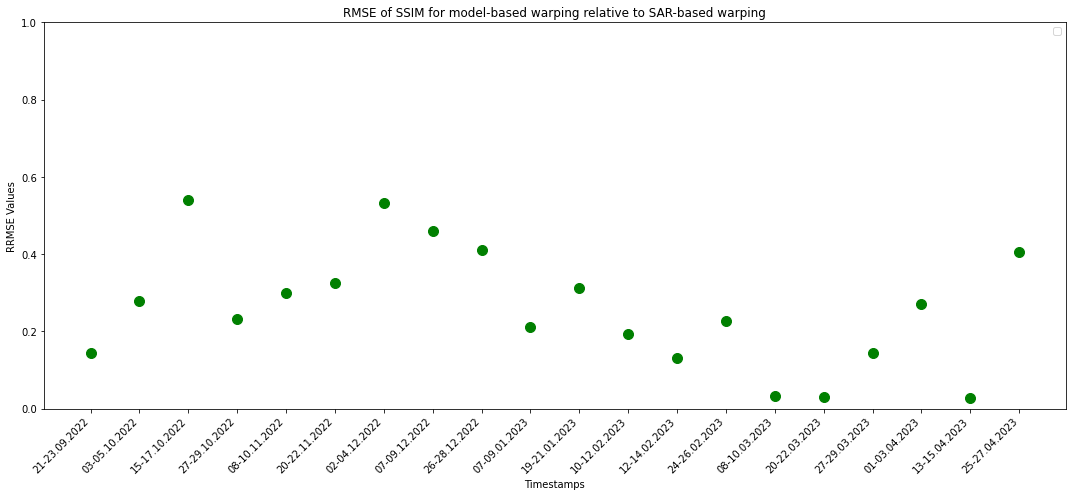

In [227]:
# Create a scatter plot
plt.close('all')  # Close any previously opened plots
fig = plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot RRMSE values
plt.scatter(date_labels, rrmse_list, color='green', s=100) #, label='RRMSE of MOD relative to SAR')

# Set the x-axis to use the date labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Since RRMSE can vary, we do not set a fixed y-axis limit as in the previous plot.
plt.ylim([0, 1])  # Adjust the limit based on the max RRMSE value

# Add labels and title to the plot
plt.xlabel('Timestamps')
plt.ylabel('RRMSE Values')
plt.title('RMSE of SSIM for model-based warping relative to SAR-based warping')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()
#save_plot(save_dir, "SSMI_difference")
# Show the plot
plt.show()

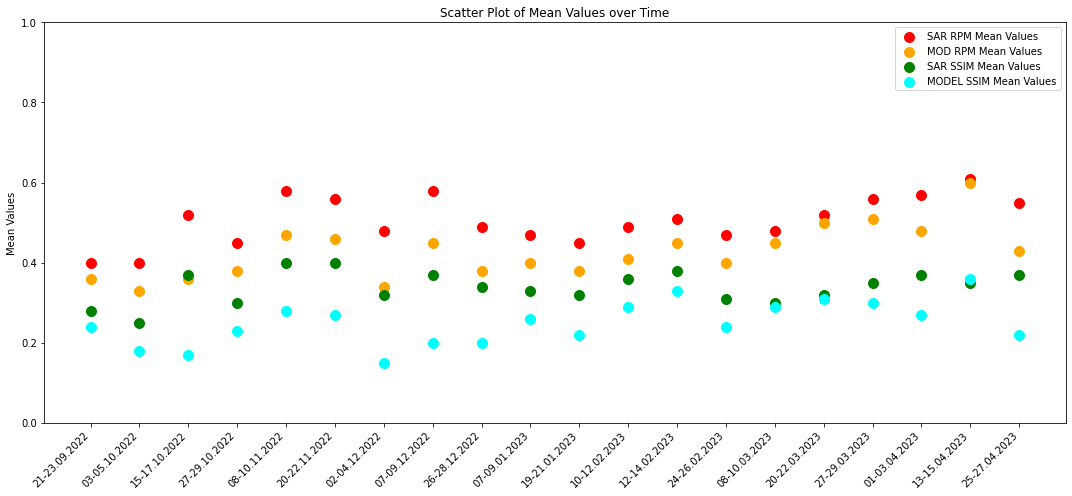

In [228]:
# Create a scatter plot

plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, sar_rpm_mean, color='red', s=100, label='SAR RPM Mean Values')
plt.scatter(date_labels, mod_rpm_mean, color='orange', s=100, label='MOD RPM Mean Values')
plt.scatter(date_labels, sar_ssim_mean, color='green',s=100, label='SAR SSIM Mean Values')
plt.scatter(date_labels, mod_ssim_mean, color='cyan',s=100, label='MODEL SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 1])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [250]:
# Calculate Relative Root Mean Square Error (RRMSE) for each date
diff_list = []

for i in range(len(timestamps)):
    diff = (sar_ssim_mean[i]-mod_ssim_mean[i])
    diff_list.append(diff)

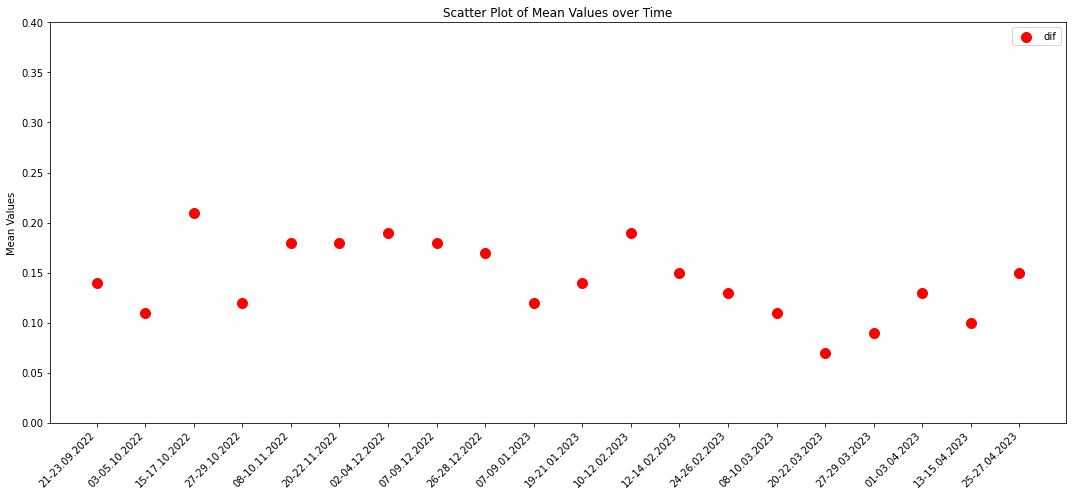

In [251]:
# Create a scatter plot

plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, diff_list, color='red', s=100, label='dif')
#plt.scatter(date_labels, mod_rpm_mean-, color='orange', s=100, label='MOD RPM Mean Values')
#plt.scatter(date_labels, sar_ssim_mean-mod_ssim_mean, color='green',s=100, label='SAR SSIM Mean Values')
#plt.scatter(date_labels, mod_ssim_mean, color='cyan',s=100, label='MOD SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 0.4])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

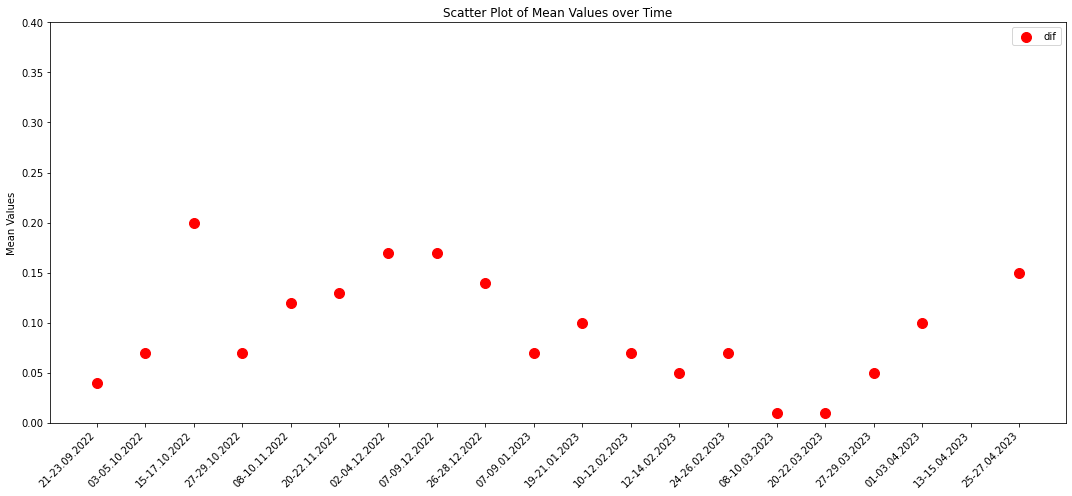

In [240]:
# Create a scatter plot

plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, diff_list, color='red', s=100, label='dif')
#plt.scatter(date_labels, mod_rpm_mean-, color='orange', s=100, label='MOD RPM Mean Values')
#plt.scatter(date_labels, sar_ssim_mean-mod_ssim_mean, color='green',s=100, label='SAR SSIM Mean Values')
#plt.scatter(date_labels, mod_ssim_mean, color='cyan',s=100, label='MOD SSIM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 0.4])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

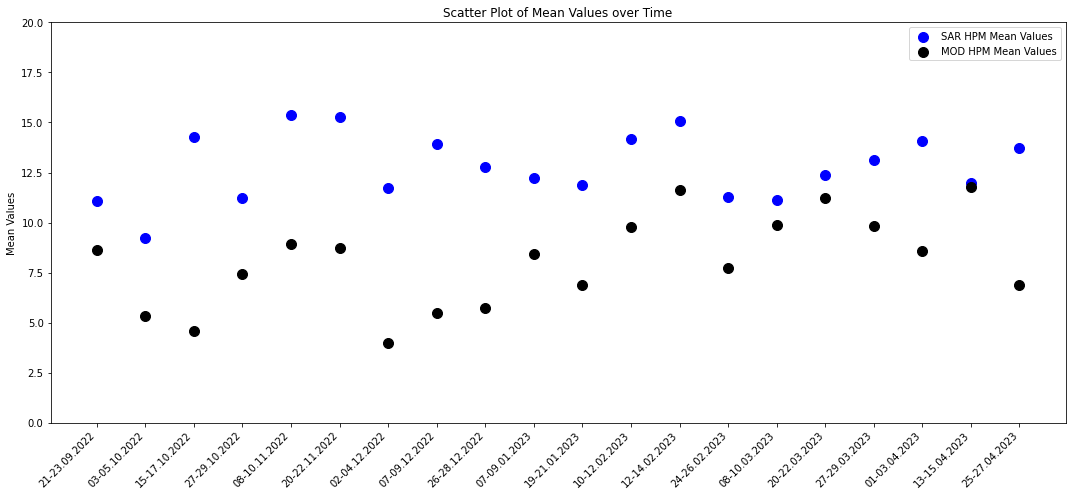

In [231]:

# Create a scatter plot
plt.figure(figsize=(15, 7))  # You can adjust the figure size as needed

# Plot each set of mean values with different colors
plt.scatter(date_labels, sar_hpm_mean, color='blue', s=100, label='SAR HPM Mean Values')
plt.scatter(date_labels, mod_hpm_mean, color='black', s=100, label='MOD HPM Mean Values')

# Set the x-axis to use the tidate labels, rotating them for better readability
plt.xticks(rotation=45, ha='right')

# Set the limits for the y-axis
plt.ylim([0, 20])

# Add labels and title to the plot
#plt.xlabel('Timestamps')
plt.ylabel('Mean Values')
plt.title('Scatter Plot of Mean Values over Time')

# Add a legend
plt.legend()

# Tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [282]:
import sys
sys.path.append("./modules")
from nansat import Nansat, Domain, NSR
from config import proj4, srs


npz_file_path = os.path.join(parent_dir, "domain_output", "domain_output.npz")
npz_data = np.load(npz_file_path)

    
X = npz_data['X']
Y = npz_data['Y']

mod_res = 2500
mod_dom = Domain(srs, f'-te {min(X.data)} {min(Y.data) - mod_res * 2} {max(X.data) + mod_res} {max(Y.data)} -tr {mod_res} {mod_res}')
lon1pm, lat1pm = mod_dom.get_geolocation_grids()
x, y = mod_dom.get_geolocation_grids(dst_srs=srs)

In [347]:
def get_good_pixel_indices(hpm, h_threshold, neighbors_threshold):
    """
    Get good pixel indices based on hessian and neighbor thresholds.

    Parameters:
    - hpm: Hessian processed matrix
    - h_threshold: Threshold for the hessian value
    - neighbors_threshold: Threshold for the number of valid neighboring pixels

    Returns:
    - gpi1: Good pixel index based on hessian value
    - gpi2: Good pixel index combining hessian and neighbors count
    """
    
    # Filtering arrays with hessian first, then excluding pixels with no neighbors
    filtered_hpm = np.where(hpm > h_threshold, hpm, np.nan)
    
    # Define a kernel to count neighbors
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])

    # Convert nan values to 1 and valid values to 0
    nan_mask = np.isnan(filtered_hpm).astype(int)

    # Count nan neighbors
    nan_neighbors = convolve(nan_mask, kernel, mode='constant')

    # Count valid neighbors by subtracting nan neighbors from total neighbors (8 for a 3x3 kernel)
    valid_neighbors = 8 - nan_neighbors

    # Mask out pixels with zero valid neighbors
    filtered_hpm[valid_neighbors < neighbors_threshold] = np.nan

    # Filter vectors with hessian value
    gpi1 = (hpm > h_threshold)
    gpi2 = (hpm > h_threshold) & (valid_neighbors >= neighbors_threshold)
    
    return gpi1, gpi2

In [381]:
from scipy.ndimage import convolve
# Hessian filter  for good pixel index (gpi1) based on hessian value
hessian=8

# Number of neighbors filter gpi2 combining hessian and neighbors with drift values count
neighbors=2
gpi_sar_warp, gpi_sar_warp = get_good_pixel_indices(sar_hpm_list[i], h_threshold=8, neighbors_threshold=neighbors)
gpi_mod_warp, gpi_mod_warp = get_good_pixel_indices(mod_hpm_list[i], h_threshold=hessian, neighbors_threshold=neighbors)


In [362]:
sar_filtered1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

(array([0.05081244, 0.0470071 , 0.04879785, 0.0470071 , 0.04969322,
        0.04588788, 0.05282703, 0.05036475, 0.05260318, 0.04812632,
        0.05327471, 0.06692916, 0.06222845, 0.06289998, 0.07051065,
        0.07588289, 0.07431599, 0.085732  , 0.07700211, 0.06961528,
        0.06357151, 0.05148397, 0.03290497, 0.02596583, 0.0149975 ,
        0.01007295, 0.00470071, 0.00179075, 0.00067153, 0.00067153]),
 array([ 8.00204468,  8.71717358,  9.43230247, 10.14743137, 10.86256027,
        11.57768917, 12.29281807, 13.00794697, 13.72307587, 14.43820477,
        15.15333366, 15.86846256, 16.58359146, 17.29872036, 18.01384926,
        18.72897816, 19.44410706, 20.15923595, 20.87436485, 21.58949375,
        22.30462265, 23.01975155, 23.73488045, 24.45000935, 25.16513824,
        25.88026714, 26.59539604, 27.31052494, 28.02565384, 28.74078274,
        29.45591164]),
 <BarContainer object of 30 artists>)

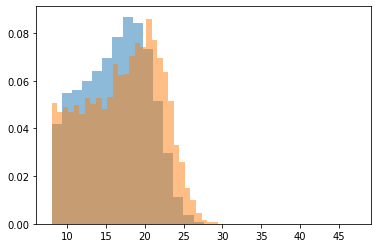

In [370]:
plt.hist(sar12_hpm_list[i][gpi], 30, alpha = 0.5, density = True) 
plt.hist(sar_hpm_list[i][gpi_sar_warp],30,  alpha = 0.5, density = True)


(array([   2.,    5.,  185.,  773., 1224., 1644., 1673.,  674.,   64.,
           3.]),
 array([0.00455084, 0.08284208, 0.16113332, 0.23942455, 0.31771579,
        0.39600703, 0.47429827, 0.5525895 , 0.63088074, 0.70917198,
        0.78746322]),
 <BarContainer object of 10 artists>)

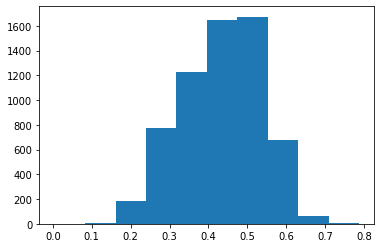

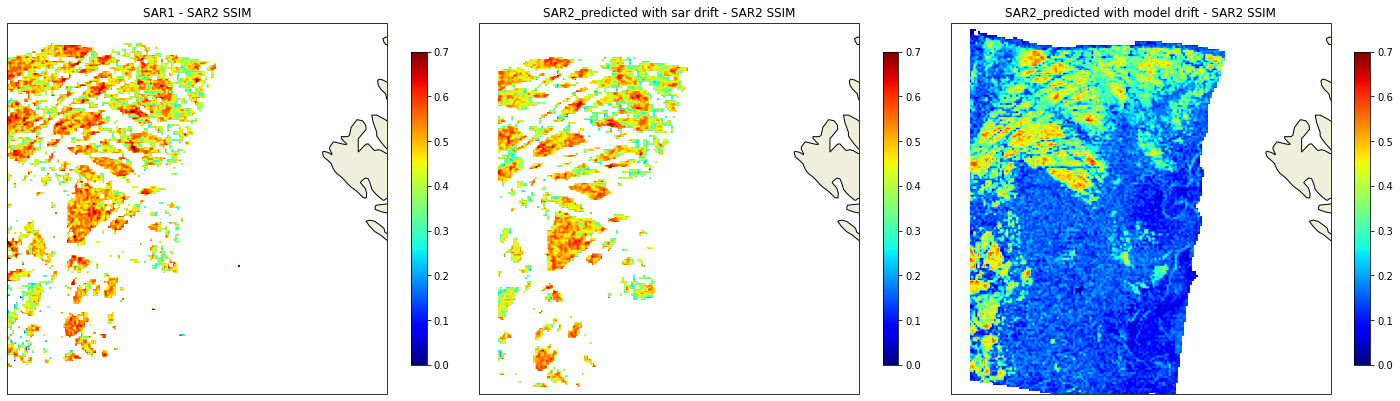

In [382]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

i = 9
gpi =  gpi2_list[i] #gpi_mod_warp #gpi_sar_warp #
crs = ccrs.LambertConformal(central_longitude=-25,
    central_latitude=77.5,
    false_easting=0.0,
    false_northing=0.0,
    secant_latitudes=None,
    standard_parallels=(77.5, 77.5),
    globe=None)

# get hi-res landmask
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])

# Create a figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,9), subplot_kw={'projection': crs})

# Figure 1



sar_filtered1 = np.where(gpi, sar12_ssim_list[i], np.nan)
img1 = ax1.imshow(sar_filtered1, extent=[x.min(), x.max(), y.min(), y.max()], origin='upper', cmap='jet', alpha=1, vmin=0, vmax=0.7)
#img1 = ax1.imshow(sar12_ssim_list[i], extent=[x.min(), x.max(), y.min(), y.max()], origin='upper', cmap='jet', alpha=1, vmin=0, vmax=0.7)
ax1.set_title('SAR1 - SAR2 SSIM')

ax1.add_feature(land_50m, edgecolor='black')
ax1.set_xlim([x.min(), x.max()-79000])
ax1.set_ylim([y.min()+100000, y.max()-150000])
plt.colorbar(img1, ax=ax1, shrink=0.5)

# Figure 2


sar_filtered2 = np.where(gpi_sar_warp, sar_ssim_list[i], np.nan)
img2 = ax2.imshow(sar_filtered2, extent=[x.min(), x.max(), y.min(), y.max()], origin='upper', cmap='jet', alpha=1, vmin=0, vmax=0.7)#
#img2 = ax2.imshow(sar_ssim_list[i], extent=[x.min(), x.max(), y.min(), y.max()], origin='upper', cmap='jet', alpha=1, vmin=0, vmax=0.7)
ax2.set_title('SAR2_predicted with sar drift - SAR2 SSIM')

ax2.add_feature(land_50m, edgecolor='black')
ax2.set_xlim([x.min(), x.max()-79000])
ax2.set_ylim([y.min()+100000, y.max()-150000])
plt.colorbar(img1, ax=ax2, shrink=0.5)

# Figure 3

#ax2.imshow(n1[1], cmap='gray', extent=[x1pm.min(), x1pm.max(), y1pm.min(), y1pm.max()], origin='upper')

mod_filtered = np.where(gpi, mod_ssim_list[i], np.nan)
#img3 = ax3.imshow(mod_filtered, extent=[x.min(), x.max(), y.min(), y.max()], origin='upper', cmap='jet', alpha=1, vmin=0, vmax=0.7)
img3 = ax3.imshow(mod_ssim_list[i], extent=[x.min(), x.max(), y.min(), y.max()], origin='upper', cmap='jet', alpha=1, vmin=0, vmax=0.7)
ax3.set_title('SAR2_predicted with model drift - SAR2 SSIM')
ax3.add_feature(land_50m, edgecolor='black')
ax3.set_xlim([x.min(), x.max()-79000])
ax3.set_ylim([y.min()+100000, y.max()-150000])
plt.colorbar(img2, ax=ax3, shrink=0.5)





plt.tight_layout()
plt.show()


In [309]:
date_labels

['21-23.09.2022',
 '03-05.10.2022',
 '15-17.10.2022',
 '27-29.10.2022',
 '08-10.11.2022',
 '20-22.11.2022',
 '02-04.12.2022',
 '07-09.12.2022',
 '26-28.12.2022',
 '07-09.01.2023',
 '19-21.01.2023',
 '10-12.02.2023',
 '12-14.02.2023',
 '24-26.02.2023',
 '08-10.03.2023',
 '20-22.03.2023',
 '27-29.03.2023',
 '01-03.04.2023',
 '13-15.04.2023',
 '25-27.04.2023']

## 3. SAR and model drift comparison

### Extracting sar and model displacements

In [149]:
# Exporting drift parametrs (between SAR1 and SAR2)
mod_drift_folder_name = 'mod_drift_output'
mod_drift_variable_names = ['model_u', 'model_v' ]
mod_drift_data, timestamps = export_pm_output_data(parent_dir, mod_drift_folder_name, mod_drift_variable_names)


u_b_list = mod_drift_data['model_u']
v_b_list = mod_drift_data['model_v']


In [150]:
# Replace inf with NaN before calculating the mean
u_sar_list = np.where(np.isinf(u_sar_list), np.nan, u_sar_list)
v_sar_list = np.where(np.isinf(v_sar_list), np.nan, v_sar_list)


### Comaprison

In [ ]:
#gpi2_list = sar_gpi2_list

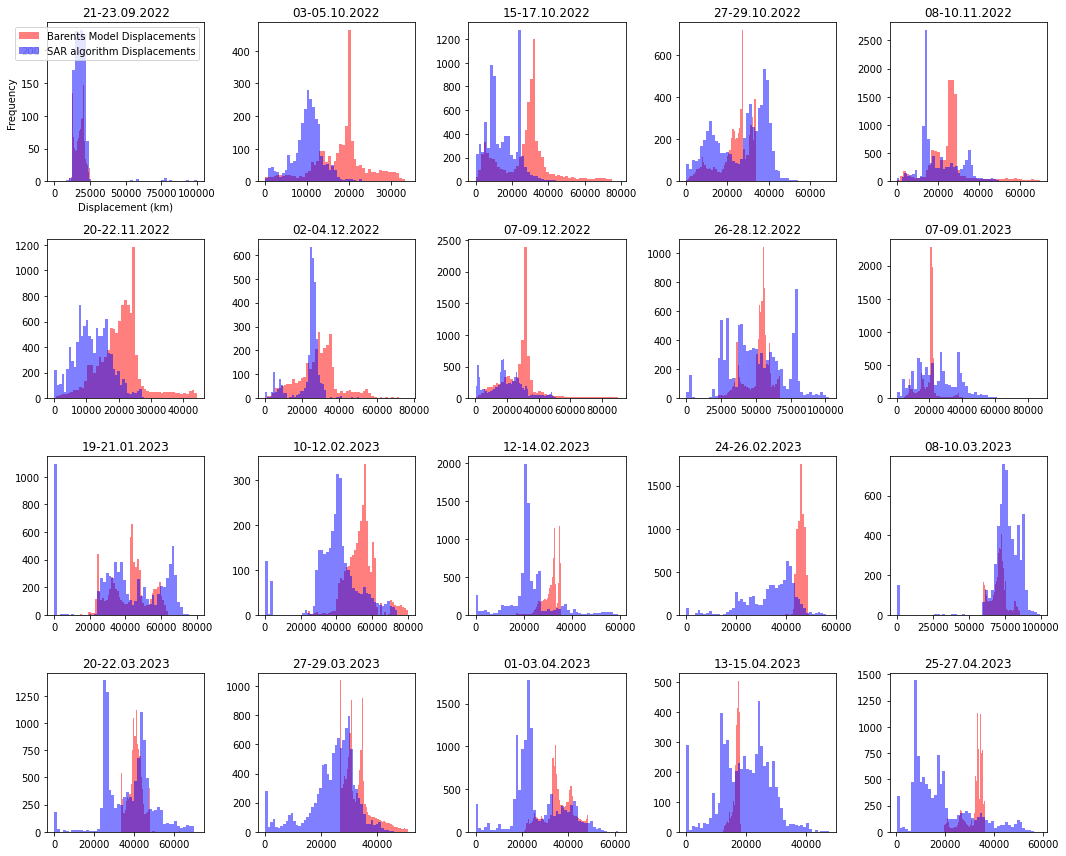

In [153]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Loop through all nine datasets
for i, ax in enumerate(axs):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    disp_model_b = disp_model_b[gpi2_list[i]].flatten()
    disp_alg = disp_alg[gpi2_list[i]].flatten()


    # Plot histograms
    ax.hist(disp_model_b, bins=50, color='red', alpha=0.5, label='Barents Model Displacements')
    ax.hist(disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm Displacements')

    # Set the title to the corresponding date
    ax.set_title(date_labels[i])

    # Only add labels and legend to the first subplot for clarity
    if i == 0:
        ax.set_xlabel('Displacement (km)')
        ax.set_ylabel('Frequency')
        ax.legend()

# Adjust the layout
plt.tight_layout()


# Show the plot
plt.show()
#save_plot(save_dir, "all_disp_comparison")
plt.close(fig)

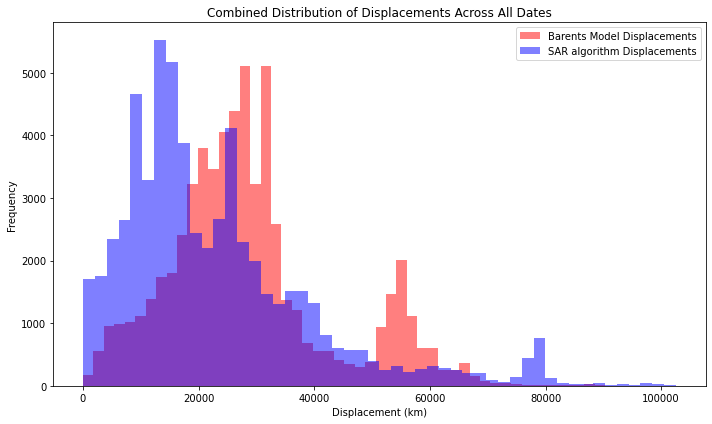

In [174]:
# Initialize a list to collect all displacements
all_disp_alg = []
all_disp_model_b = []

# Loop through all nine datasets
for i in range(9):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_model_b = disp_model_b[gpi2_list[i]].flatten()
    disp_alg = disp_alg[gpi2_list[i]].flatten()

    # Collect the displacements
    all_disp_alg.extend(disp_alg)
    all_disp_model_b.extend(disp_model_b)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# Plot the combined histograms
plt.hist(all_disp_model_b, bins=50, color='red', alpha=0.5, label='Barents Model Displacements')
plt.hist(all_disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm Displacements')

# Add labels and legend
plt.xlabel('Displacement (km)')
plt.ylabel('Frequency')
plt.title('Combined Distribution of Displacements Across All Dates')
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
#save_plot(save_dir, "all_disp_in_one_hist_comparison")
plt.close(fig)

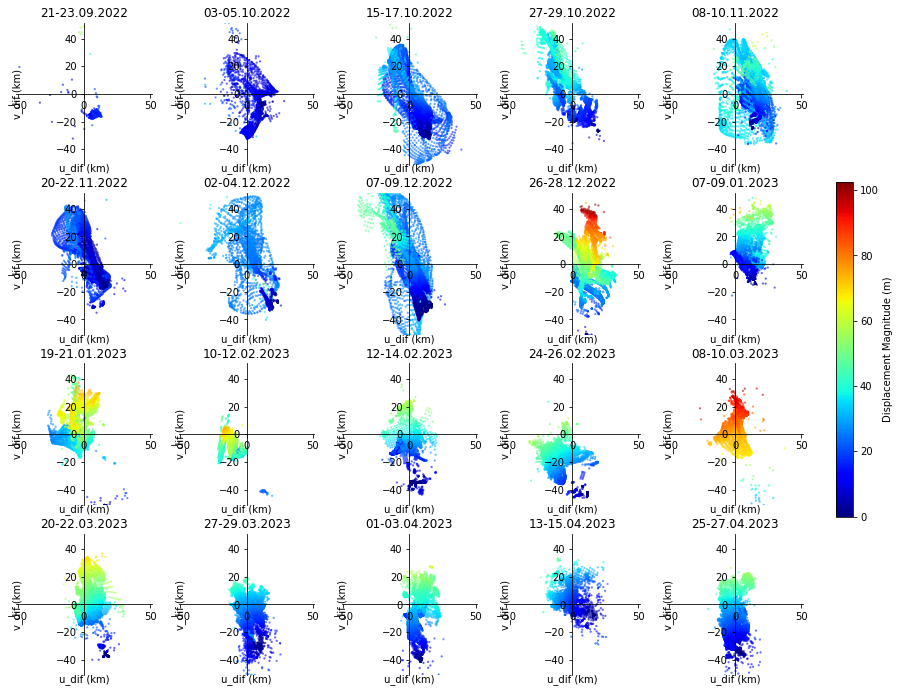

In [175]:
fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Calculate global range of displacement magnitudes
global_min, global_max = float('inf'), float('-inf')
for i in range(len(u_sar_list)):
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten()/1000
    global_min = min(global_min, disp_alg_masked.min())
    global_max = max(global_max, disp_alg_masked.max())
    # Generate a color array based on the magnitude of the points
    colors = disp_alg_masked

# Normalize the color range globally
norm = plt.Normalize(global_min, global_max)

# Creating a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  # You have to set_array for the ScalarMappable

# Loop through all nine datasets
for i, ax in enumerate(axs):
    # Calculate the displacement
    u_dif = u_b_list[i]/1000 - u_sar_list[i]/1000
    v_dif = v_b_list[i]/1000 - v_sar_list[i]/1000

    # Apply the gpi2 mask and flatten the arrays
    u_dif = u_dif[gpi2_list[i]].flatten()
    v_dif = v_dif[gpi2_list[i]].flatten()

    # Calculate the absolute total displacement for colours
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten()/1000
    
    # Generate a color array based on the magnitude of the points
    colors = disp_alg_masked
    
    # Create the scatter plot for the current dataset
    scatter = ax.scatter(u_dif, v_dif, c=colors, cmap='jet', norm=norm, alpha=0.6, edgecolors='none', s=5) #viridis

    

    # Move axes to go through (0,0)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    
    # Move axis labels outside
    ax.xaxis.set_label_coords(1.05, 0.01)
    ax.yaxis.set_label_coords(0.05, 1.02)

    # Hide top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    

    # Set the title to the corresponding date
    ax.set_title(date_labels[i])
           
    ax.set_xlabel('u_dif (km)')
    ax.set_ylabel('v_dif (km)')
    
    # Only add labels and legend to the first subplot for clarity
    #if i == 0:
        #ax.legend()
    
#Setting Equal Axis Limits:
max_abs_val = max([max(abs(u_dif.max()), abs(u_dif.min()), abs(v_dif.max()), abs(v_dif.min())) for i in range(len(u_sar_list))])
for ax in axs:
    ax.set_xlim([-max_abs_val, max_abs_val])
    ax.set_ylim([-max_abs_val, max_abs_val])





# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Displacement Magnitude (m)')

# Adjust the layout
#plt.tight_layout()

# Show the plot
plt.show()

# Uncomment the next line to save the plot
# save_plot(save_dir, "all_disp_comparison")

plt.close(fig)


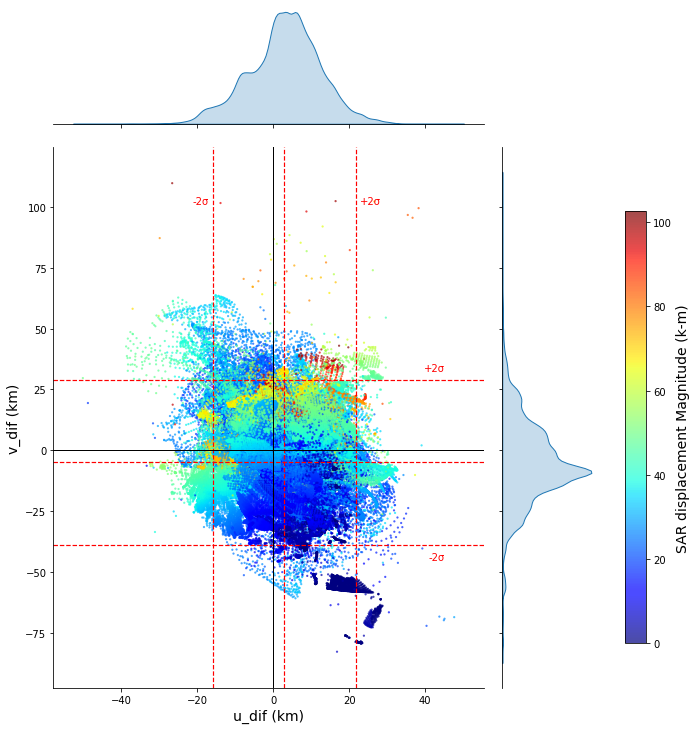

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set data for p,lotting

all_u_dif = []
all_v_dif = []
all_disp_mag = []  # Store the displacement magnitudes

# Loop through the datasets
for i in range(len(u_sar_list)):
    # Calculate the displacement differences
    u_dif = u_b_list[i]/1000 - u_sar_list[i]/1000
    v_dif = v_b_list[i]/1000 - v_sar_list[i]/1000

    # Apply the gpi2 mask and flatten the arrays
    u_dif = u_dif[gpi2_list[i]].flatten()
    v_dif = v_dif[gpi2_list[i]].flatten()

    # Calculate the magnitude of sar displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)

    # Apply the mask from gpi2_list and flatten the array
    disp_mag = disp_alg[gpi2_list[i]].flatten() / 1000  # Converting to km

    # Collect the displacements and their magnitudes
    all_u_dif.extend(u_dif)
    all_v_dif.extend(v_dif)
    all_disp_mag.extend(disp_mag)
    
    
# Initialize a JointGrid
joint_grid = sns.JointGrid(x=all_u_dif, y=all_v_dif,  height=10, ratio=4)

# Plot a scatter plot in the center
joint_grid.plot_joint(sns.scatterplot, alpha=0.7, edgecolor='none', s=5)

# Plot KDE plots on the margins
joint_grid.plot_marginals(sns.kdeplot, fill=True) #color = "grey"

# Set the axis labels
joint_grid.set_axis_labels('u_dif (km)', 'v_dif (km)',  fontsize=14)

# Calculate means and standard deviations
mean_x, std_x = np.mean(all_u_dif), np.std(all_u_dif)
mean_y, std_y = np.mean(all_v_dif), np.std(all_v_dif)

# Add lines for means and ±2 standard deviations on the scatter plot

# For horizontal lines
label_offset_y = max(all_v_dif) * 0.025  # Adjust the offset as needed
joint_grid.ax_joint.axvline(mean_x, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axvline(mean_x - 2*std_x, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axvline(mean_x + 2*std_x, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.text(x=max(all_u_dif)*0.95, y=mean_y + 2*std_y + label_offset_y, s='+2σ', color='r', verticalalignment='bottom', horizontalalignment='right')
joint_grid.ax_joint.text(x=max(all_u_dif)*0.95, y=mean_y - 2*std_y - label_offset_y, s='-2σ', color='r', verticalalignment='top', horizontalalignment='right')


# For vertical lines
label_offset_x = max(all_u_dif) * 0.025  # Adjust the offset as needed
joint_grid.ax_joint.axhline(mean_y, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axhline(mean_y - 2*std_y, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axhline(mean_y + 2*std_y, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.text(x=mean_x + 2*std_x + label_offset_x, y=max(all_v_dif)*0.95, s='+2σ', color='r', verticalalignment='top', horizontalalignment='left')
joint_grid.ax_joint.text(x=mean_x - 2*std_x - label_offset_x, y=max(all_v_dif)*0.95, s='-2σ', color='r', verticalalignment='top', horizontalalignment='right')


# Add two vertical lines intersecting at (0, 0)
joint_grid.ax_joint.axvline(0, color='k', linestyle='-', linewidth = 1)
joint_grid.ax_joint.axhline(0, color='k', linestyle='-', linewidth = 1)


# Color each point based on the displacement magnitude
points = joint_grid.ax_joint.collections[0]  # Get the points collection
points.set_cmap('jet')  # Set the colormap, instead viridis can be used
points.set_norm(plt.Normalize(vmin=np.min(all_disp_mag), vmax=np.max(all_disp_mag)))  # Normalize with a max value of 80, instead max can be used: np.max(all_disp_mag)
points.set_array(np.array(all_disp_mag))  # Set the array of values for coloring

# Adjust layout to make space for the colorbar
plt.subplots_adjust(right=0.8)

# Add a colorbar to the right of the plot
cbar_ax = joint_grid.fig.add_axes([0.84, 0.1, 0.03, 0.6])  # Adjust these values as needed
cbar = plt.colorbar(points, cax=cbar_ax)
cbar.set_label('SAR displacement Magnitude (k-m)', fontsize=14)

# Adjust layout for better alignment
#plt.tight_layout()

# Show the plot
plt.show()


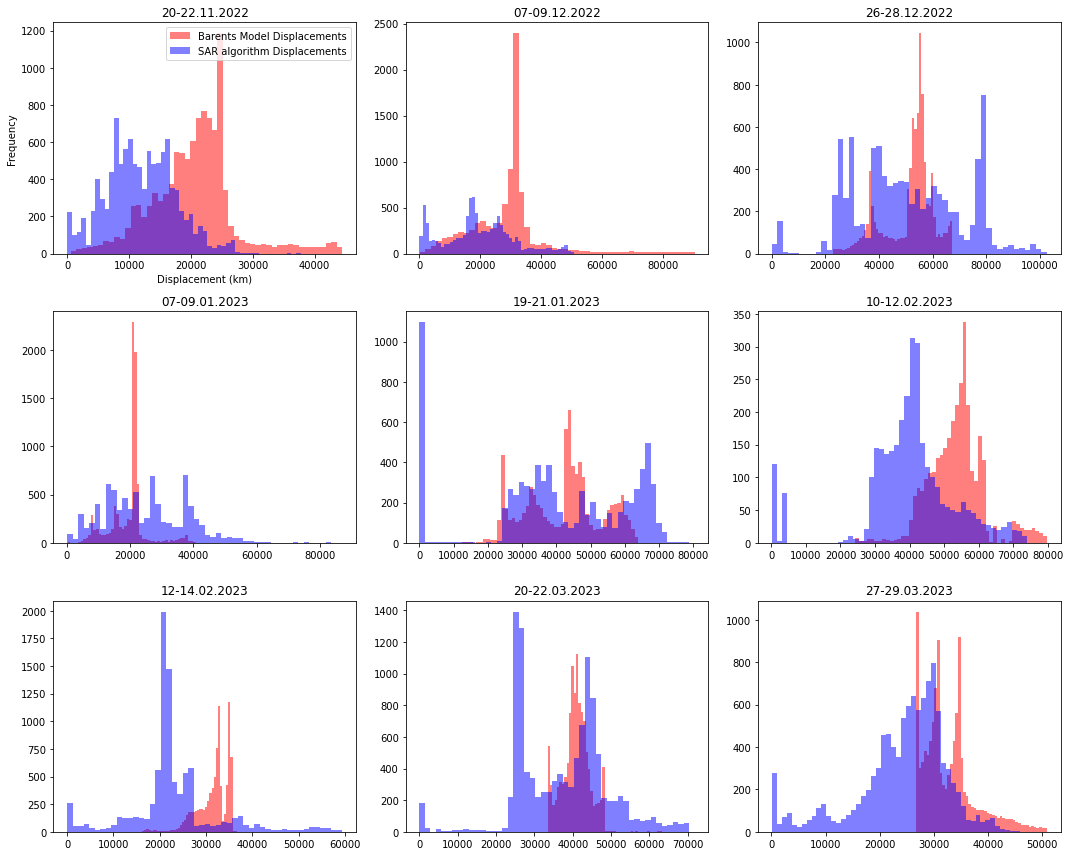

In [12]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Loop through all nine datasets
for i, ax in enumerate(axs):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    disp_model_b = disp_model_b[gpi2_list[i]].flatten()
    disp_alg = disp_alg[gpi2_list[i]].flatten()


    # Plot histograms
    ax.hist(disp_model_b, bins=50, color='red', alpha=0.5, label='Barents Model Displacements')
    ax.hist(disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm Displacements')

    # Set the title to the corresponding date
    ax.set_title(date_labels[i])

    # Only add labels and legend to the first subplot for clarity
    if i == 0:
        ax.set_xlabel('Displacement (km)')
        ax.set_ylabel('Frequency')
        ax.legend()

# Adjust the layout
plt.tight_layout()


# Show the plot
plt.show()
#save_plot(save_dir, "all_disp_comparison")
plt.close(fig)

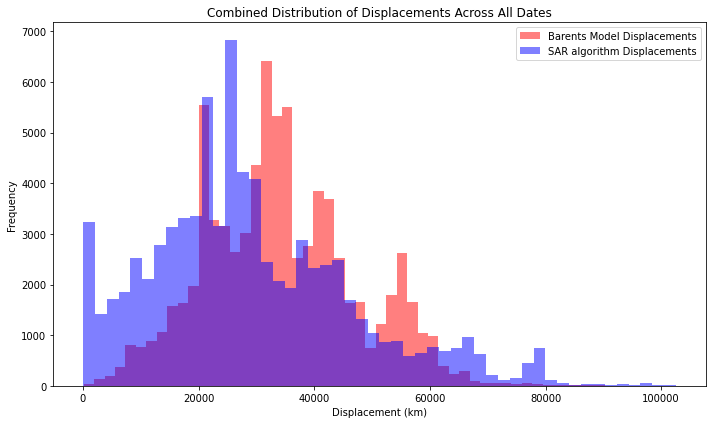

In [87]:
# Initialize a list to collect all displacements
all_disp_alg = []
all_disp_model_b = []

# Loop through all nine datasets
for i in range(9):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_model_b = disp_model_b[gpi2_list[i]].flatten()
    disp_alg = disp_alg[gpi2_list[i]].flatten()

    # Collect the displacements
    all_disp_alg.extend(disp_alg)
    all_disp_model_b.extend(disp_model_b)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
# Plot the combined histograms
plt.hist(all_disp_model_b, bins=50, color='red', alpha=0.5, label='Barents Model Displacements')
plt.hist(all_disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm Displacements')

# Add labels and legend
plt.xlabel('Displacement (km)')
plt.ylabel('Frequency')
plt.title('Combined Distribution of Displacements Across All Dates')
plt.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
#save_plot(save_dir, "all_disp_in_one_hist_comparison")
plt.close(fig)

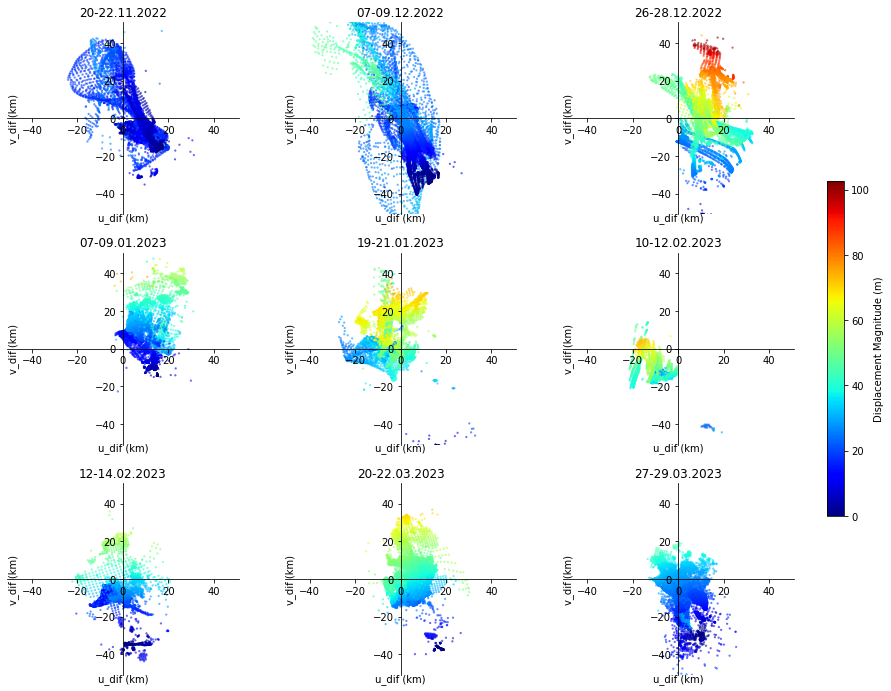

In [139]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Calculate global range of displacement magnitudes
global_min, global_max = float('inf'), float('-inf')
for i in range(len(u_sar_list)):
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten()/1000
    global_min = min(global_min, disp_alg_masked.min())
    global_max = max(global_max, disp_alg_masked.max())
    # Generate a color array based on the magnitude of the points
    colors = disp_alg_masked

# Normalize the color range globally
norm = plt.Normalize(global_min, global_max)

# Creating a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])  # You have to set_array for the ScalarMappable

# Loop through all nine datasets
for i, ax in enumerate(axs):
    # Calculate the displacement
    u_dif = u_b_list[i]/1000 - u_sar_list[i]/1000
    v_dif = v_b_list[i]/1000 - v_sar_list[i]/1000

    # Apply the gpi2 mask and flatten the arrays
    u_dif = u_dif[gpi2_list[i]].flatten()
    v_dif = v_dif[gpi2_list[i]].flatten()

    # Calculate the absolute total displacement for colours
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten()/1000
    
    # Generate a color array based on the magnitude of the points
    colors = disp_alg_masked
    
    # Create the scatter plot for the current dataset
    scatter = ax.scatter(u_dif, v_dif, c=colors, cmap='jet', norm=norm, alpha=0.6, edgecolors='none', s=5) #viridis

    

    # Move axes to go through (0,0)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    
    # Move axis labels outside
    ax.xaxis.set_label_coords(1.05, 0.01)
    ax.yaxis.set_label_coords(0.05, 1.02)

    # Hide top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    

    # Set the title to the corresponding date
    ax.set_title(date_labels[i])
           
    ax.set_xlabel('u_dif (km)')
    ax.set_ylabel('v_dif (km)')
    
    # Only add labels and legend to the first subplot for clarity
    #if i == 0:
        #ax.legend()
    
#Setting Equal Axis Limits:
max_abs_val = max([max(abs(u_dif.max()), abs(u_dif.min()), abs(v_dif.max()), abs(v_dif.min())) for i in range(len(u_sar_list))])
for ax in axs:
    ax.set_xlim([-max_abs_val, max_abs_val])
    ax.set_ylim([-max_abs_val, max_abs_val])





# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Displacement Magnitude (m)')

# Adjust the layout
#plt.tight_layout()

# Show the plot
plt.show()

# Uncomment the next line to save the plot
# save_plot(save_dir, "all_disp_comparison")

plt.close(fig)


In [ ]:
sns.jointplot( x="bill_length_mm", y="bill_depth_mm")

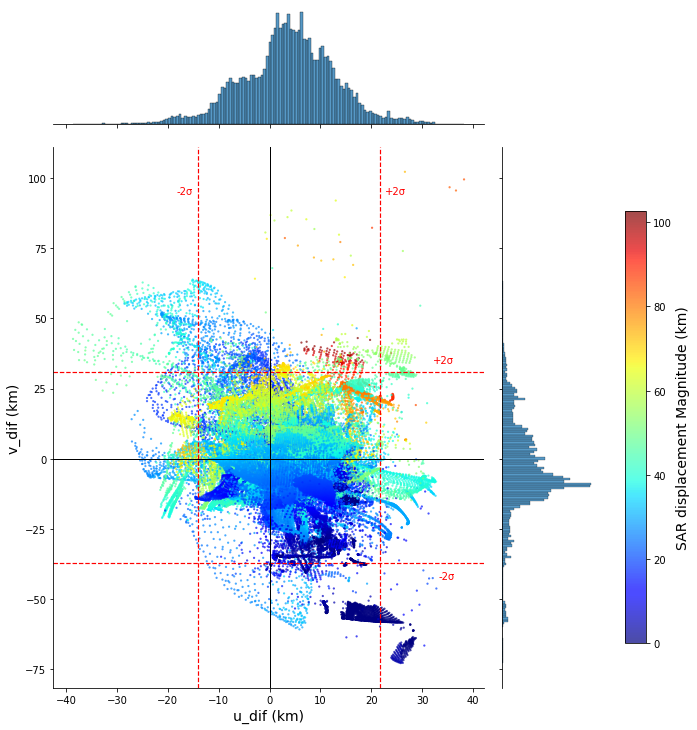

In [114]:

# Set data for p,lotting
all_u_dif = []
all_v_dif = []
all_disp_mag = []  # Store the displacement magnitudes

# Loop through the datasets
for i in range(len(u_sar_list)):
    # Calculate the displacement differences
    u_dif = u_b_list[i]/1000 - u_sar_list[i]/1000
    v_dif = v_b_list[i]/1000 - v_sar_list[i]/1000

    # Apply the gpi2 mask and flatten the arrays
    u_dif = u_dif[gpi2_list[i]].flatten()
    v_dif = v_dif[gpi2_list[i]].flatten()

    # Calculate the magnitude of sar displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)

    # Apply the mask from gpi2_list and flatten the array
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten() / 1000  # Converting to km

    # Collect the displacements and their magnitudes
    all_u_dif.extend(u_dif)
    all_v_dif.extend(v_dif)
    all_disp_mag.extend(disp_alg_masked)

# Create a scatter plot using Seaborn's jointplot
joint_plot = sns.jointplot(x=all_u_dif, y=all_v_dif, kind="scatter", alpha=0.7, edgecolor='none', s=5, height=10, ratio=4)

# Set the axis labels
joint_plot.set_axis_labels('u_dif (km)', 'v_dif (km)',fontsize=14)

# Calculate means and standard deviations
mean_x, std_x = np.mean(all_u_dif), np.std(all_u_dif)
mean_y, std_y = np.mean(all_v_dif), np.std(all_v_dif)

# Add lines for means and ±2 standard deviations on the scatter plot

# For horizontal lines
label_offset_y = max(all_v_dif) * 0.025  # Adjust the offset as needed
#joint_grid.ax_joint.axvline(mean_x, color='g', linestyle='--', linewidth = 1.2)
joint_plot.ax_joint.axvline(mean_x - 2*std_x, color='r', linestyle='--', linewidth = 1.2)
joint_plot.ax_joint.axvline(mean_x + 2*std_x, color='r', linestyle='--', linewidth = 1.2)
joint_plot.ax_joint.text(x=max(all_u_dif)*0.95, y=mean_y + 2*std_y + label_offset_y, s='+2σ', color='r', verticalalignment='bottom', horizontalalignment='right')
joint_plot.ax_joint.text(x=max(all_u_dif)*0.95, y=mean_y - 2*std_y - label_offset_y, s='-2σ', color='r', verticalalignment='top', horizontalalignment='right')


# For vertical lines
label_offset_x = max(all_u_dif) * 0.025  # Adjust the offset as needed
#joint_grid.ax_joint.axhline(mean_y, color='g', linestyle='--', linewidth = 1.2)
joint_plot.ax_joint.axhline(mean_y - 2*std_y, color='r', linestyle='--', linewidth = 1.2)
joint_plot.ax_joint.axhline(mean_y + 2*std_y, color='r', linestyle='--', linewidth = 1.2)
joint_plot.ax_joint.text(x=mean_x + 2*std_x + label_offset_x, y=max(all_v_dif)*0.95, s='+2σ', color='r', verticalalignment='top', horizontalalignment='left')
joint_plot.ax_joint.text(x=mean_x - 2*std_x - label_offset_x, y=max(all_v_dif)*0.95, s='-2σ', color='r', verticalalignment='top', horizontalalignment='right')

# Add two vertical lines intersecting at (0, 0)
joint_plot.ax_joint.axvline(0, color='k', linestyle='-', linewidth = 1)
joint_plot.ax_joint.axhline(0, color='k', linestyle='-', linewidth = 1)


# For plotting on histograms
# Add lines for means and ±2 standard deviations on x-axis histogram
#joint_plot.ax_marg_x.axvline(mean_x, color='r', linestyle='--')
#joint_plot.ax_marg_x.axvline(mean_x - 2*std_x, color='g', linestyle='--')
#joint_plot.ax_marg_x.axvline(mean_x + 2*std_x, color='g', linestyle='--')

# Add lines for means and ±2 standard deviations on y-axis histogram
#joint_plot.ax_marg_y.axhline(mean_y, color='r', linestyle='--')
#joint_plot.ax_marg_y.axhline(mean_y - 2*std_y, color='g', linestyle='--')
#joint_plot.ax_marg_y.axhline(mean_y + 2*std_y, color='g', linestyle='--')

# Color each point based on the displacement magnitude
points = joint_plot.ax_joint.collections[0]  # Get the points collection
points.set_cmap('jet')  # Set the colormap, instead viridis can be used
points.set_norm(plt.Normalize(vmin=np.min(all_disp_mag), vmax=np.max(all_disp_mag)))  # Normalize with a max value of 80, instead max can be used: np.max(all_disp_mag)
points.set_array(np.array(all_disp_mag))  # Set the array of values for coloring

# Adjust layout to make space for the colorbar
plt.subplots_adjust(right=0.8)

# Add a colorbar to the right of the plot
cbar_ax = joint_plot.fig.add_axes([0.84, 0.1, 0.03, 0.6])  # Adjust these values as needed
cbar = plt.colorbar(points, cax=cbar_ax)
cbar.set_label('SAR displacement Magnitude (km)',fontsize=14)

# Adjust layout for better alignment
#plt.tight_layout()

# Show the plot
plt.show()


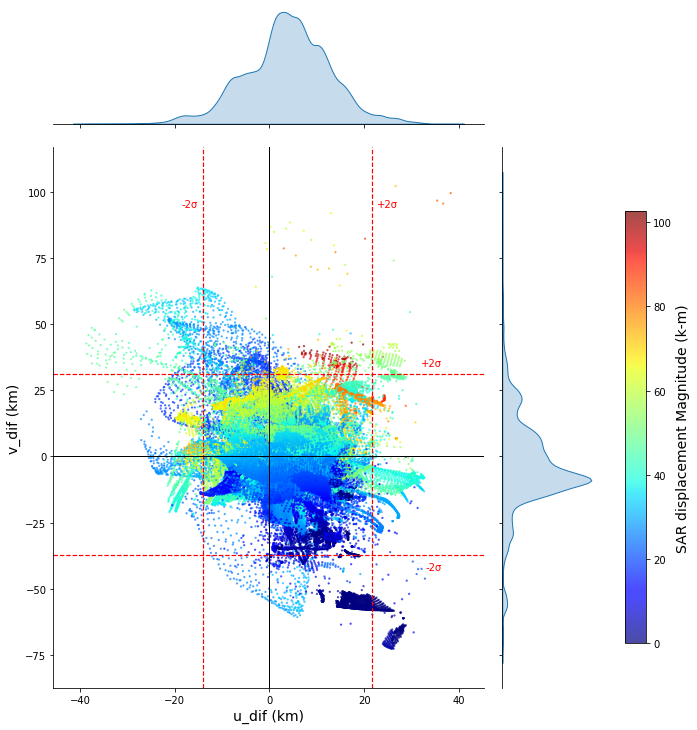

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set data for p,lotting

all_u_dif = []
all_v_dif = []
all_disp_mag = []  # Store the displacement magnitudes

# Loop through the datasets
for i in range(len(u_sar_list)):
    # Calculate the displacement differences
    u_dif = u_b_list[i]/1000 - u_sar_list[i]/1000
    v_dif = v_b_list[i]/1000 - v_sar_list[i]/1000

    # Apply the gpi2 mask and flatten the arrays
    u_dif = u_dif[gpi2_list[i]].flatten()
    v_dif = v_dif[gpi2_list[i]].flatten()

    # Calculate the magnitude of sar displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)

    # Apply the mask from gpi2_list and flatten the array
    disp_mag = disp_alg[gpi2_list[i]].flatten() / 1000  # Converting to km

    # Collect the displacements and their magnitudes
    all_u_dif.extend(u_dif)
    all_v_dif.extend(v_dif)
    all_disp_mag.extend(disp_mag)
    
    
# Initialize a JointGrid
joint_grid = sns.JointGrid(x=all_u_dif, y=all_v_dif,  height=10, ratio=4)

# Plot a scatter plot in the center
joint_grid.plot_joint(sns.scatterplot, alpha=0.7, edgecolor='none', s=5)

# Plot KDE plots on the margins
joint_grid.plot_marginals(sns.kdeplot, fill=True) #color = "grey"

# Set the axis labels
joint_grid.set_axis_labels('u_dif (km)', 'v_dif (km)',  fontsize=14)

# Calculate means and standard deviations
mean_x, std_x = np.mean(all_u_dif), np.std(all_u_dif)
mean_y, std_y = np.mean(all_v_dif), np.std(all_v_dif)

# Add lines for means and ±2 standard deviations on the scatter plot

# For horizontal lines
label_offset_y = max(all_v_dif) * 0.025  # Adjust the offset as needed
#joint_grid.ax_joint.axvline(mean_x, color='g', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axvline(mean_x - 2*std_x, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axvline(mean_x + 2*std_x, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.text(x=max(all_u_dif)*0.95, y=mean_y + 2*std_y + label_offset_y, s='+2σ', color='r', verticalalignment='bottom', horizontalalignment='right')
joint_grid.ax_joint.text(x=max(all_u_dif)*0.95, y=mean_y - 2*std_y - label_offset_y, s='-2σ', color='r', verticalalignment='top', horizontalalignment='right')


# For vertical lines
label_offset_x = max(all_u_dif) * 0.025  # Adjust the offset as needed
#joint_grid.ax_joint.axhline(mean_y, color='g', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axhline(mean_y - 2*std_y, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.axhline(mean_y + 2*std_y, color='r', linestyle='--', linewidth = 1.2)
joint_grid.ax_joint.text(x=mean_x + 2*std_x + label_offset_x, y=max(all_v_dif)*0.95, s='+2σ', color='r', verticalalignment='top', horizontalalignment='left')
joint_grid.ax_joint.text(x=mean_x - 2*std_x - label_offset_x, y=max(all_v_dif)*0.95, s='-2σ', color='r', verticalalignment='top', horizontalalignment='right')


# Add two vertical lines intersecting at (0, 0)
joint_grid.ax_joint.axvline(0, color='k', linestyle='-', linewidth = 1)
joint_grid.ax_joint.axhline(0, color='k', linestyle='-', linewidth = 1)


# Color each point based on the displacement magnitude
points = joint_grid.ax_joint.collections[0]  # Get the points collection
points.set_cmap('jet')  # Set the colormap, instead viridis can be used
points.set_norm(plt.Normalize(vmin=np.min(all_disp_mag), vmax=np.max(all_disp_mag)))  # Normalize with a max value of 80, instead max can be used: np.max(all_disp_mag)
points.set_array(np.array(all_disp_mag))  # Set the array of values for coloring

# Adjust layout to make space for the colorbar
plt.subplots_adjust(right=0.8)

# Add a colorbar to the right of the plot
cbar_ax = joint_grid.fig.add_axes([0.84, 0.1, 0.03, 0.6])  # Adjust these values as needed
cbar = plt.colorbar(points, cax=cbar_ax)
cbar.set_label('SAR displacement Magnitude (k-m)', fontsize=14)

# Adjust layout for better alignment
#plt.tight_layout()

# Show the plot
plt.show()


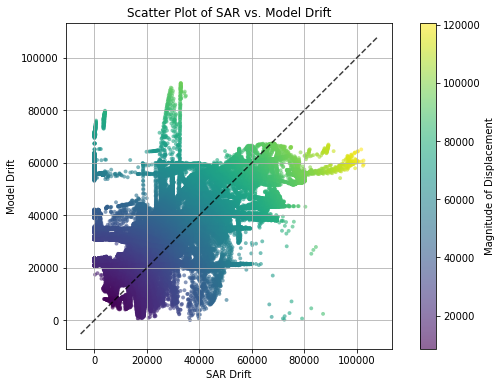

In [133]:
# Initialize empty lists to collect all displacements
all_disp_alg = []
all_disp_model_b = []

# Assuming u_sar_list, v_sar_list, u_b_list, v_b_list, and gpi2_list are defined
# Loop through all datasets and collect displacements
for i in range(9):
    # Your existing code for calculating displacements goes here
    
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_model_b = disp_model_b[gpi2_list[i]].flatten()
    disp_alg = disp_alg[gpi2_list[i]].flatten()

    # Collect the displacements
    all_disp_alg.extend(disp_alg)
    all_disp_model_b.extend(disp_model_b)

# Convert the lists to NumPy arrays
all_disp_alg = np.array(all_disp_alg)
all_disp_model_b = np.array(all_disp_model_b)

# Now create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a color array based on the magnitude of the points
colors = np.sqrt(all_disp_alg**2 + all_disp_model_b**2)
scatter = ax.scatter(all_disp_alg, all_disp_model_b, c=colors, cmap='viridis', alpha=0.6, edgecolors='none', s=15)

# Plot a 45-degree line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k', alpha=0.75, zorder=2, linestyle="--")  # 45 degree line
ax.set_aspect('equal', 'box')  # ensure aspect ratio is equal

# Add labels and title
ax.set_xlabel('SAR Drift')
ax.set_ylabel('Model Drift')
ax.set_title('Scatter Plot of SAR vs. Model Drift')

# Create a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Magnitude of Displacement')

# Show grid
plt.grid(True)

# Display the plot
plt.show()
#save_plot(save_dir, "Disp_comparison_scatter_plot")
plt.close(fig)

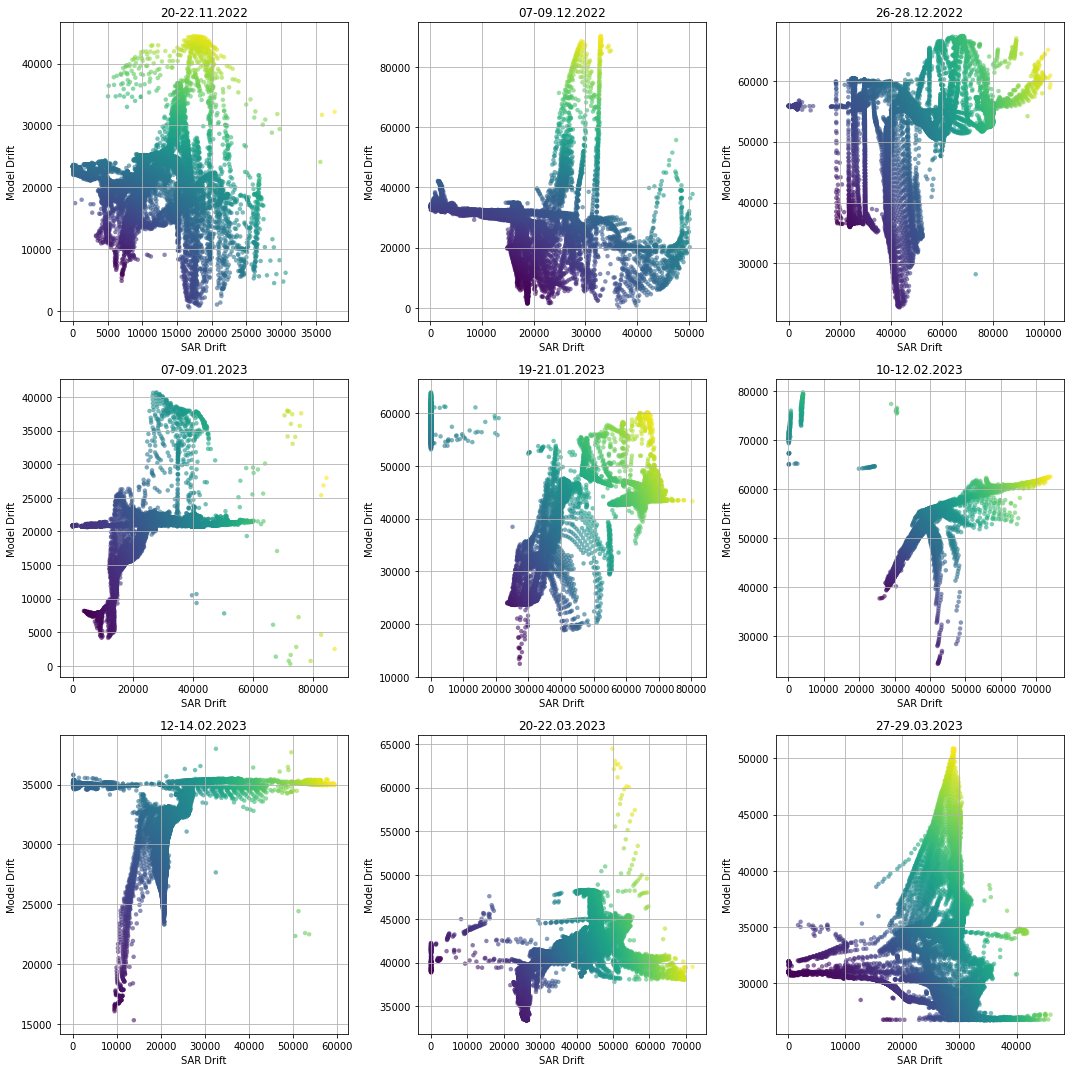

In [76]:
# Initialize a figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjusted for 9 subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through all datasets and create scatter plots for each
for i in range(9):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_model_b_masked = disp_model_b[gpi2_list[i]].flatten()
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten()

    # Generate a color array based on the magnitude of the points
    colors = np.sqrt(disp_alg_masked**2 + disp_model_b_masked**2)
    
    # Create the scatter plot for the current dataset
    scatter = axes[i].scatter(disp_alg_masked, disp_model_b_masked, c=colors, cmap='viridis', alpha=0.6, edgecolors='none', s=20)
    

    # Set labels and titles for each subplot
    axes[i].set_xlabel('SAR Drift')
    axes[i].set_ylabel('Model Drift')
    axes[i].set_title(f'{date_labels[i]}')
    axes[i].grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

#save_plot(save_dir, "disp_comparison_9")
# Show the plot
plt.show()

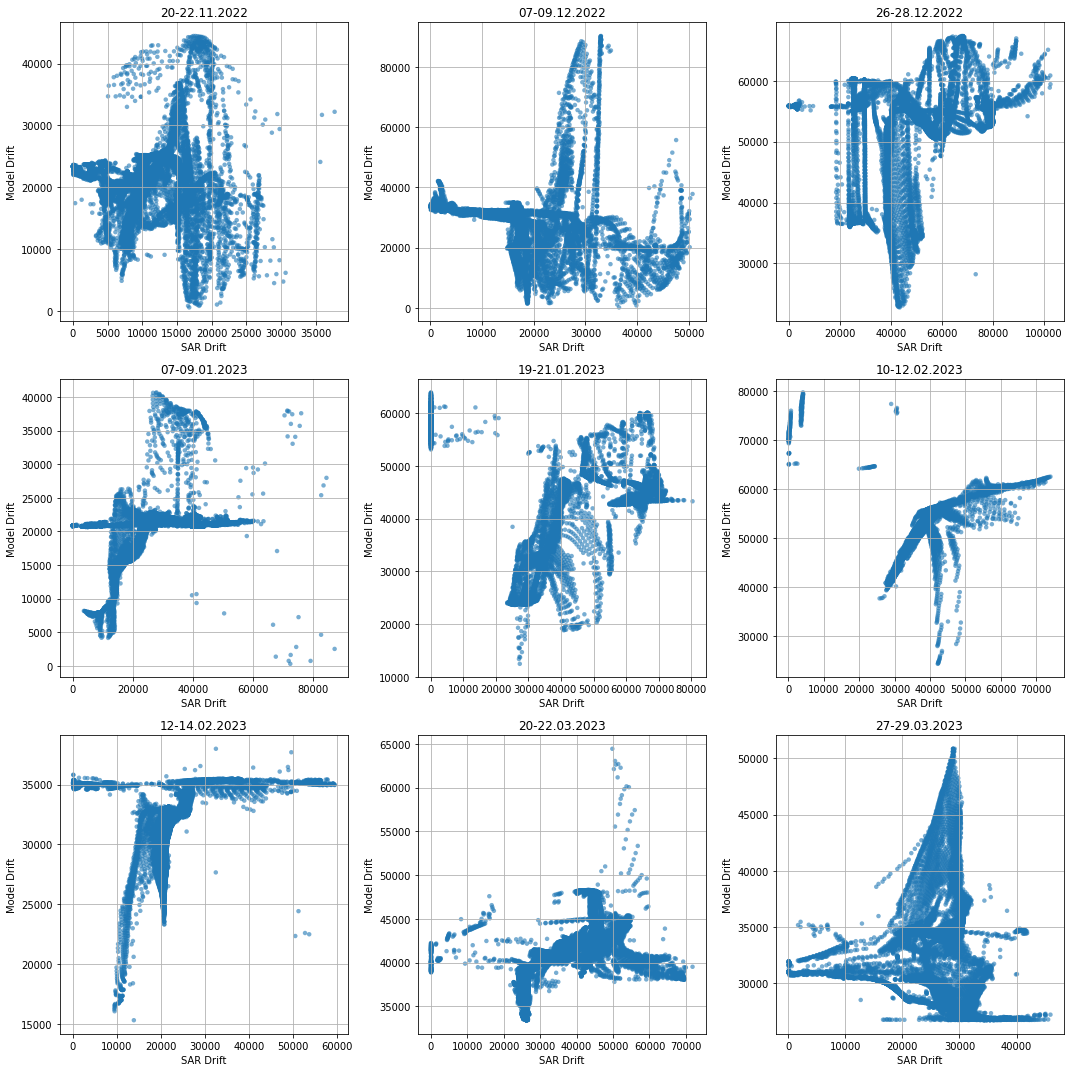

In [75]:
# Re-initialize the figure with 9 subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjusted for 9 subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through all datasets and create scatter plots for each
for i in range(9):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_model_b_masked = disp_model_b[gpi2_list[i]].flatten()
    disp_alg_masked = disp_alg[gpi2_list[i]].flatten()

    # Create the scatter plot for the current dataset without a line of best fit
    axes[i].scatter(disp_alg_masked, disp_model_b_masked, alpha=0.6, edgecolors='none', s=20)

    # Set labels and titles for each subplot
    axes[i].set_xlabel('SAR Drift')
    axes[i].set_ylabel('Model Drift')
    axes[i].set_title(f'{date_labels[i]}')
    axes[i].grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()
#save_plot(save_dir, "disp_comparison_9")
# Show the plot
plt.show()


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

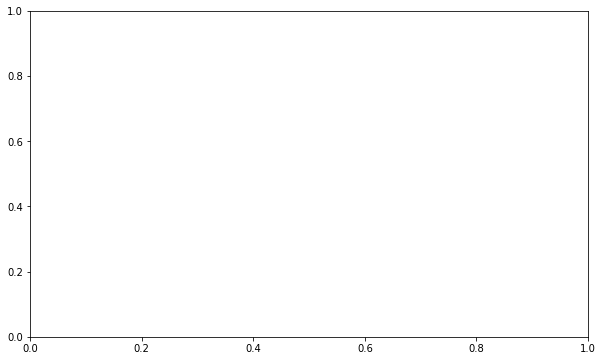

In [118]:
# Create scatter plot with points colored according to their value (from low to high)
for i in range(9):
    # Calculate the displacement
    disp_alg = np.sqrt(u_sar_list[i]**2 + v_sar_list[i]**2)
    disp_model_b = np.sqrt(u_b_list[i]**2 + v_b_list[i]**2)
    
    # Apply the mask from gpi2_list and flatten the array
    disp_model_b = disp_model_b[gpi2_list[i]].flatten()
    disp_alg = disp_alg[gpi2_list[i]].flatten()

    # Collect the displacements
    all_disp_alg.extend(disp_alg)
    all_disp_model_b.extend(disp_model_b)

fig, ax = plt.subplots(figsize=(10, 6))

# Generate a color array based on the magnitude of the points
colors = np.sqrt(all_disp_alg**2 + all_disp_model_b**2)
scatter = ax.scatter(all_disp_alg, all_disp_model_b, c=colors, cmap='viridis', alpha=0.6, edgecolors='none', s=80)

# Compute a line of best fit
m, b = np.polyfit(all_disp_alg, all_disp_model_b, 1)
# Plot the line of best fit using the NumPy arrays
ax.plot(all_disp_alg, m * all_disp_alg + b, color='red')

# Add labels and title
ax.set_xlabel('SAR Drift')
ax.set_ylabel('Model Drift')
ax.set_title('Scatter Plot of SAR vs. Model Drift')

# Create a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Magnitude of Displacement')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

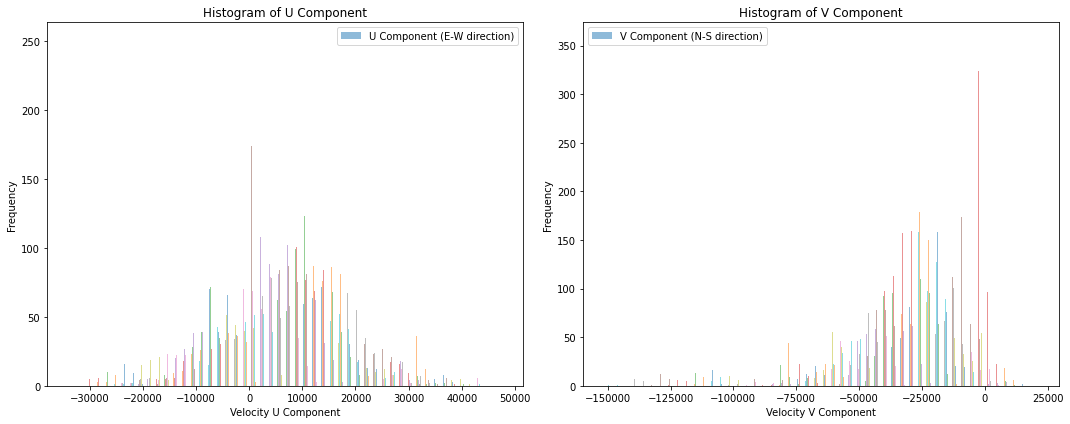

In [52]:
import matplotlib.pyplot as plt
import numpy as np


# Flatten the lists to get combined histograms for all datasets
u_all = np.concatenate(u_sar_list)
v_all = np.concatenate(v_sar_list)

# Plot histograms for u and v components
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(u_all, bins=50, alpha=0.5, label='U Component (E-W direction)')
plt.xlabel('Velocity U Component')
plt.ylabel('Frequency')
plt.title('Histogram of U Component')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(v_all, bins=50, alpha=0.5, label='V Component (N-S direction)')
plt.xlabel('Velocity V Component')
plt.ylabel('Frequency')
plt.title('Histogram of V Component')
plt.legend()

plt.tight_layout()
plt.show()


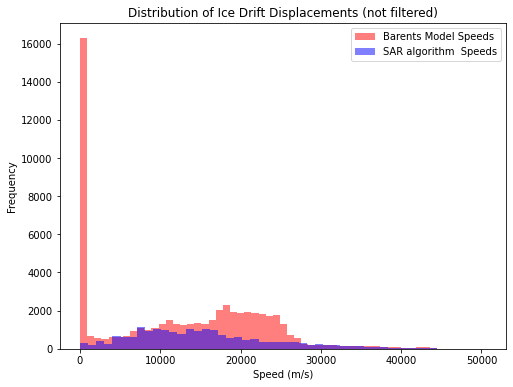

In [49]:
disp_model_b = np.sqrt(( model_u**2+ model_v**2)) 
disp_alg = np.sqrt((upm_list_no_inf**2+ vpm_list_no_inf**2))

disp_model_b = disp_model_b.flatten()
disp_alg = disp_alg.flatten()


plt.figure(figsize=(8,6))


# Plotting Model Speed
plt.hist(disp_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Speeds')

# Plotting Reference Speed
plt.hist(disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm  Speeds')

plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Ice Drift Displacements (not filtered)')
plt.legend()
plt.show()



In [95]:
u_sar_list[6], v_sar_list[6], u_b_list[6], v_b_list[6], date_labels[6]

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[-8.04480526e+03, -8.04957451e+03, -8.05630690e+03, ...,
         -2.60923933e+04, -2.52419010e+04, -2.46050690e+04],
        [-7.98051781e+03, -7.98416553e+03, -7.98980035e+03, ...,
         -2.80148915e+04, -2.69326256e+04, -2.60729891e+04],
        [-7.91635804e+03, -7.91916895e+03, -7.92311991e+03, ...,
         -3.04500782e+04, -2.89644242e+04, -2.78478583e+04],
        ...,
        [ 4.02439419e+01,  3.37517506e+

In [110]:
i = 1
date_labels[i]

'07-09.12.2022'

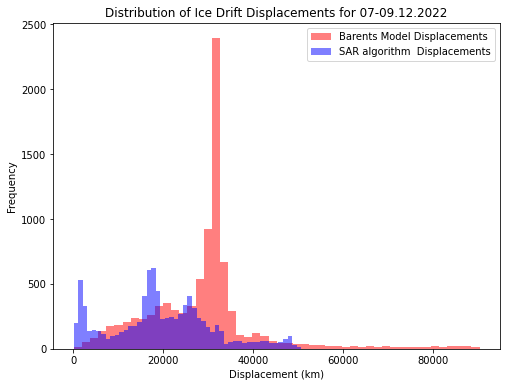

Reference disp:
Mean disp: 19.7 km
Min disp: 0.1 km
Max disp: 50.7 km
95th percentile disp: 41902.5201 km

Model disp:
Mean disp: 29.0 km
Min disp: 0.1 km
Max disp: 90.3 km
95th percentile disp: 50051.6363 km


In [111]:
i = 1

disp_model_b = np.sqrt((  u_b_list[i]**2+ v_b_list[i]**2)) 
disp_alg = np.sqrt((u_sar_list[i]**2+ v_sar_list[i]**2))

disp_model_b = disp_model_b[gpi2_list[i]].flatten()
disp_alg = disp_alg[gpi2_list[i]].flatten()

fig = plt.figure(figsize=(8,6))

# Plotting Model displacements
plt.hist(disp_model_b, bins=50, color='red', alpha=0.5, label= 'Barents Model Displacements')

# Plotting Reference displacement
plt.hist(disp_alg, bins=50, color='blue', alpha=0.5, label='SAR algorithm  Displacements')

plt.xlabel('Displacement (km)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Ice Drift Displacements for {date_labels[i]}')
plt.legend()

# Save plot
plt.savefig("/home/jovyan/experiment_data/2022-2023_48h_experiment/figures/drift_comparison_hist.png", dpi=300, bbox_inches='tight')


plt.show()
#save_plot(save_dir, f"disp_dif_for_{date_labels[i]}")
plt.close(fig)

# Print statistics for reference displacements
percentile_95_ref = np.percentile(disp_alg, 95)
mean_disp_ref = np.nanmean(disp_alg)
min_disp_ref = np.nanmin(disp_alg)
max_disp_ref = np.nanmax(disp_alg)

print(f"Reference disp:")
print(f"Mean disp: {mean_disp_ref/1000:.1f} km")
print(f"Min disp: {min_disp_ref/1000:.1f} km")
print(f"Max disp: {max_disp_ref/1000:.1f} km")
print(f"95th percentile disp: {percentile_95_ref:.4f} km")

# Print statistics for model displacements
percentile_95_model = np.percentile(disp_model_b, 95)
mean_disp_model = np.nanmean(disp_model_b)
min_disp_model = np.nanmin(disp_model_b)
max_disp_model = np.nanmax(disp_model_b)

print("\nModel disp:")
print(f"Mean disp: {mean_disp_model/1000:.1f} km")
print(f"Min disp: {min_disp_model/1000:.1f} km")
print(f"Max disp: {max_disp_model/1000:.1f} km")
print(f"95th percentile disp: {percentile_95_model:.4f} km")
